### **Model Training/Evaluation/Selection**

In [3]:
import pandas as pd
import numpy as np

In [4]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/IBM Advanced Data Science Cap/data/cleaned_data.csv")

## Trees

Random Forest Classifier


In [5]:
#Let's perform a super simple and easy Random Forest Classifier.
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Selecting the features and target
features = data[['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']]
target = data['Good']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

accuracy


0.89625

In [ ]:
#I bet I can get that accuracy to 95%. Let's do some feature engineering.

In [ ]:
#Let's just look at what it's doing. In the first five rows, it got a false negative (wrongly predicted a good apple as a bad apple).
#More false negatives could mean wasting money that shouldn't be wasted. False positives could mean customers get bad apples, which of course could hurt the brand, and cost lots of money in the long run.
#If we have to choose between the two, throwing out a few good apples would probably be preferable to selling the same number of bad apples to customers.
print(model.predict(X_train.iloc[0:5]))

[1 1 0 0 1]


In [ ]:
from sklearn.metrics import confusion_matrix
#Let's calculate false positives vs false negatives.

conf_matrix = confusion_matrix(y_test, y_pred)

false_positive = conf_matrix[0][1]
false_negative = conf_matrix[1][0]

print(f"False Positives: {false_positive}")
print(f"False Negatives: {false_negative}")

False Positives: 45
False Negatives: 38


In [ ]:
#Ok, so there's not a wild imbalance in terms of false positives vs false negatives. That's probably good.
#Let's try to find the most unpredictable feature, and see if we can get higher accuracy be getting rid of it.



In [ ]:
#Hypotheses: Size and weight are probably positively correlated.
#I think acidity and ripeness are inversely correlated. The riper it is, the less acidic.
#Let's see what the data says.

correlation_matrix = data[['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']].corr()
print(correlation_matrix)

                 Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
Size         1.000000 -0.170702  -0.324680     0.169868  -0.018892 -0.134773   
Weight      -0.170702  1.000000  -0.154246    -0.095882  -0.092263 -0.243824   
Sweetness   -0.324680 -0.154246   1.000000    -0.037552   0.095882 -0.273800   
Crunchiness  0.169868 -0.095882  -0.037552     1.000000  -0.259607 -0.201982   
Juiciness   -0.018892 -0.092263   0.095882    -0.259607   1.000000 -0.097144   
Ripeness    -0.134773 -0.243824  -0.273800    -0.201982  -0.097144  1.000000   
Acidity      0.196218  0.016414   0.085999     0.069943   0.248714 -0.202669   

              Acidity  
Size         0.196218  
Weight       0.016414  
Sweetness    0.085999  
Crunchiness  0.069943  
Juiciness    0.248714  
Ripeness    -0.202669  
Acidity      1.000000  


In [ ]:

correlation_matrix = data[['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity', 'Good']].corr()
print(correlation_matrix)

                 Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
Size         1.000000 -0.170702  -0.324680     0.169868  -0.018892 -0.134773   
Weight      -0.170702  1.000000  -0.154246    -0.095882  -0.092263 -0.243824   
Sweetness   -0.324680 -0.154246   1.000000    -0.037552   0.095882 -0.273800   
Crunchiness  0.169868 -0.095882  -0.037552     1.000000  -0.259607 -0.201982   
Juiciness   -0.018892 -0.092263   0.095882    -0.259607   1.000000 -0.097144   
Ripeness    -0.134773 -0.243824  -0.273800    -0.201982  -0.097144  1.000000   
Acidity      0.196218  0.016414   0.085999     0.069943   0.248714 -0.202669   
Good         0.244007  0.001421   0.250998    -0.012376   0.260223 -0.264315   

              Acidity      Good  
Size         0.196218  0.244007  
Weight       0.016414  0.001421  
Sweetness    0.085999  0.250998  
Crunchiness  0.069943 -0.012376  
Juiciness    0.248714  0.260223  
Ripeness    -0.202669 -0.264315  
Acidity      1.000000 -0.007697  
Good   

In [ ]:
# Calculate the correlation matrix and flatten it to a series
corr_matrix = data[['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']].corr().abs()
corr_pairs = corr_matrix.unstack()

# Sort by absolute value
sorted_pairs = corr_pairs.sort_values(ascending=False)

# Remove self-correlations
no_self_corr = sorted_pairs[sorted_pairs.index.get_level_values(0) != sorted_pairs.index.get_level_values(1)]

# Filter out duplicate pairs
unique_pairs = no_self_corr[no_self_corr.index.get_level_values(0) < no_self_corr.index.get_level_values(1)]

# Display the highest correlations without duplicates
print(unique_pairs.head(10))



Size         Sweetness    0.324680
Ripeness     Sweetness    0.273800
Crunchiness  Juiciness    0.259607
Acidity      Juiciness    0.248714
Ripeness     Weight       0.243824
Acidity      Ripeness     0.202669
Crunchiness  Ripeness     0.201982
Acidity      Size         0.196218
Size         Weight       0.170702
Crunchiness  Size         0.169868
dtype: float64


In [ ]:
#For my next iteration of random forest classifier, I'm just going to home in on the highest absolute valued correlations with the target.
#The four biggest correlation features are Size, Sweetness, Juiciness, and Ripeness.

'''
             Acidity      Good
Size         0.196218  0.244007
Weight       0.016414  0.001421
Sweetness    0.085999  0.250998
Crunchiness  0.069943 -0.012376
Juiciness    0.248714  0.260223
Ripeness    -0.202669 -0.264315
Acidity      1.000000 -0.007697
Good        -0.007697  1.000000 '''

'\n             Acidity      Good\nSize         0.196218  0.244007\nWeight       0.016414  0.001421\nSweetness    0.085999  0.250998\nCrunchiness  0.069943 -0.012376\nJuiciness    0.248714  0.260223\nRipeness    -0.202669 -0.264315\nAcidity      1.000000 -0.007697\nGood        -0.007697  1.000000 '

In [ ]:
#Trying again, throwing out the lower correlation features.
# Selecting the features and target
features = data[['Size', 'Sweetness', 'Juiciness', 'Ripeness']]
target = data['Good']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

accuracy

0.83

In [ ]:
#0.83, so that didn't work.
#Let's try some more.
features = data[['Size', 'Sweetness', 'Juiciness', 'Ripeness']]
target = data['Good']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

accuracy

0.83

In [ ]:
#Juiciness and Ripeness are very strongly correlated to the target, but not very strongly correlated to each other.
#To my intuition, this would mean that they convey a lot of information about the target, and there's not a lot of overlapping information.
features = data[['Juiciness', 'Ripeness']]
target = data['Good']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_pred)

accuracy

0.83

In [ ]:
#That didn't work at all! 0.6475.

In [ ]:
features = data[['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']]
target = data['Good']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

accuracy

0.89625

In [ ]:
#If this is a binary classifier, I need to change that. There are really three stages of an apple's life cycle: pre-ripe (bad), ripe (good), post-ripe (good). Binary classification won't work.
#It's not a binary classifier.


In [ ]:
#Things to try: Messing around with number of trees. Default is 100.
#Print out both training and test accuracy to evaluate over and underfitting.
for n in [50, 100, 150, 200]:
    features = data[['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']]
    target = data['Good']

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

    # Initialize the model
    model = RandomForestClassifier(n_estimators=n, random_state=42)

    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    print(f"Number of Trees: {n}")
    print(f"Train Accuracy: {train_accuracy}")
    print(f"Test Accuracy: {test_accuracy}")


Number of Trees: 50
Train Accuracy: 0.9996875
Test Accuracy: 0.89
Number of Trees: 100
Train Accuracy: 1.0
Test Accuracy: 0.89625
Number of Trees: 150
Train Accuracy: 1.0
Test Accuracy: 0.90375
Number of Trees: 200
Train Accuracy: 1.0
Test Accuracy: 0.90625


In [ ]:
#Seems to actually improve with more trees. Let's see when that starts to taper off.
for n in [200, 300, 400, 500, 600, 700, 800, 900, 1000]:
    features = data[['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']]
    target = data['Good']

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

    # Initialize the model
    model = RandomForestClassifier(n_estimators=n, random_state=42)

    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    print(f"Number of Trees: {n}")
    print(f"Train Accuracy: {train_accuracy}")
    print(f"Test Accuracy: {test_accuracy}")

Number of Trees: 200
Train Accuracy: 1.0
Test Accuracy: 0.90625
Number of Trees: 300
Train Accuracy: 1.0
Test Accuracy: 0.91125
Number of Trees: 400
Train Accuracy: 1.0
Test Accuracy: 0.9125
Number of Trees: 500
Train Accuracy: 1.0
Test Accuracy: 0.91375
Number of Trees: 600
Train Accuracy: 1.0
Test Accuracy: 0.9125


KeyboardInterrupt: 

In [ ]:
#Ok great. We got 500 trees. 0.91375
#Let's try to get to 0.95.



In [ ]:
#I'm gonna mess around with some binning.
data['bucketed_Ripeness'] = pd.cut(data['Ripeness'], bins=3, labels=[0,1,2])
#I have a feeling this might not be great. But let's see.

In [ ]:
data.head()

In [ ]:
#Things to try: Messing around with number of trees. Default is 100.
#Print out both training and test accuracy to evaluate over and underfitting.
for n in [50, 100, 150, 200]:
    features = data[['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'bucketed_Ripeness', 'Acidity']]
    target = data['Good']

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

    # Initialize the model
    model = RandomForestClassifier(n_estimators=n, random_state=42)

    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    print(f"Number of Trees: {n}")
    print(f"Train Accuracy: {train_accuracy}")
    print(f"Test Accuracy: {test_accuracy}")

In [ ]:
#Let's try more buckets.
data['bucketed_Ripeness'] = pd.cut(data['Ripeness'], bins=10, labels=[i for i in range(10)])


In [ ]:
data.head()

In [ ]:
#Things to try: Messing around with number of trees. Default is 100.
#Print out both training and test accuracy to evaluate over and underfitting.
features = data[['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'bucketed_Ripeness', 'Acidity']]
target = data['Good']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize the model
model = RandomForestClassifier(n_estimators=500, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Number of Trees: {n}")
print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

In [ ]:
data['bucketed_Ripeness'] = pd.cut(data['Ripeness'], bins=2, labels=[0,1])

In [ ]:
#Things to try: Messing around with number of trees. Default is 100.
#Print out both training and test accuracy to evaluate over and underfitting.
features = data[['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'bucketed_Ripeness', 'Acidity']]
target = data['Good']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize the model
model = RandomForestClassifier(n_estimators=500, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Number of Trees: {n}")
print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

XGBoost Tree

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Convert the dataset into an optimized data structure called Dmatrix that XGBoost supports
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Define the parameters for the XGBoost model
params = {
    'objective': 'multi:softmax',  # Change to 'multi:softmax' for multiclass and also set num_class
    'max_depth': 100,  # Depth of each tree
    'min_child_weight': 1,  # Minimum number of instances needed in each node
    'subsample': 0.8,  # Subsample ratio of the training instances
    'colsample_bytree': 0.8,  # Subsample ratio of columns when constructing each tree
    'eta': 0.3,  # Learning rate
    'seed': 42,  # Random seed
    'num_class': 2
}

# Specify the number of training rounds
num_round = 100

# Train the XGBoost model
bst = xgb.train(params, dtrain, num_round)

# Make predictions
preds = bst.predict(dtest)
predictions = [round(value) for value in preds]

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy * 100.0}%")

Accuracy: 90.25%


In [ ]:
#Oh interesting. Xgboost didn't even do better.
params = {
    'objective': 'binary:logistic',  # Change to 'multi:softmax' for multiclass and also set num_class
    'max_depth': 6,
    'min_child_weight': 1,  # Minimum number of instances needed in each node
    'subsample': 0.8,  # Subsample ratio of the training instances
    'colsample_bytree': 0.8,  # Subsample ratio of columns when constructing each tree
    'eta': 0.3,  # Learning rate
    'seed': 43,  # Random seed
}

# Specify the number of training rounds
num_round = 100

# Train the XGBoost model
bst = xgb.train(params, dtrain, num_round)

# Make predictions
preds = bst.predict(dtest)
predictions = [round(value) for value in preds]

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy * 100.0}%")

Accuracy: 89.25%


MLP Classifier

In [ ]:
#This gives great results. Messing around with max_iter is important.
#Maybe randomforestclassifier caps out around 91% or something.
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

# It's often a good practice to scale your data for neural network models
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize MLPClassifier
# This is a basic setup. You might need to tune the hyperparameters like hidden_layer_sizes, learning_rate_init, etc.
mlp = MLPClassifier(hidden_layer_sizes=(100), learning_rate_init=0.001, max_iter=2000, alpha=0.0002, activation='relu', solver='adam', random_state=42)

# Fit the model
mlp.fit(X_train_scaled, y_train)

# Make predictions
predictions = mlp.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f"Model accuracy: {accuracy: f}")

25/25 [==============================] - 0s 1ms/step


ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [ ]:
predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f"Model accuracy: {accuracy: f}")

25/25 [==============================] - 0s 1ms/step


ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [ ]:
print(predictions)

[[9.99998808e-01]
 [1.06516991e-05]
 [7.76875995e-21]
 [1.00000000e+00]
 [9.12206644e-24]
 [1.00000000e+00]
 [2.05586007e-10]
 [4.53626329e-12]
 [1.00000000e+00]
 [9.99996424e-01]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.28091530e-28]
 [1.00000000e+00]
 [1.00000000e+00]
 [2.06826441e-18]
 [1.59083834e-06]
 [2.27826096e-14]
 [9.68161107e-17]
 [1.21594490e-09]
 [7.41243191e-15]
 [5.86390859e-18]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.69544063e-15]
 [4.54243631e-12]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.15146250e-12]
 [1.00000000e+00]
 [2.65328538e-07]
 [1.12097035e-34]
 [0.00000000e+00]
 [2.66652917e-15]
 [1.00000000e+00]
 [3.27351563e-13]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [2.25143713e-16]
 [9.99999523e-01]
 [4.43295593e-16]
 [9.44529355e-01]
 [1.92599917e-23]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.41850067e-14]
 [2.39785553e-11]
 [1.00000000e+00]
 [9.99999881e-01]
 [6.10954823e-22]
 [1.14753129e-06]
 [1.00000000e+00]
 [2.022593

In [ ]:
#This gives great results. Messing around with max_iter is important.
#Maybe randomforestclassifier caps out around 91% or something.
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
# It's often a good practice to scale your data for neural network models
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize MLPClassifier
# This is a basic setup. You might need to tune the hyperparameters like hidden_layer_sizes, learning_rate_init, etc.
mlp = MLPClassifier(hidden_layer_sizes=(100), learning_rate_init=0.001, max_iter=2000, alpha=0.0002, activation='relu', solver='adam', random_state=42)

# Fit the model
mlp.fit(X_train_scaled, y_train)

# Make predictions
predictions = mlp.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f"Model accuracy: {accuracy: f}")

Model accuracy:  0.958750


pandas.core.frame.DataFrame

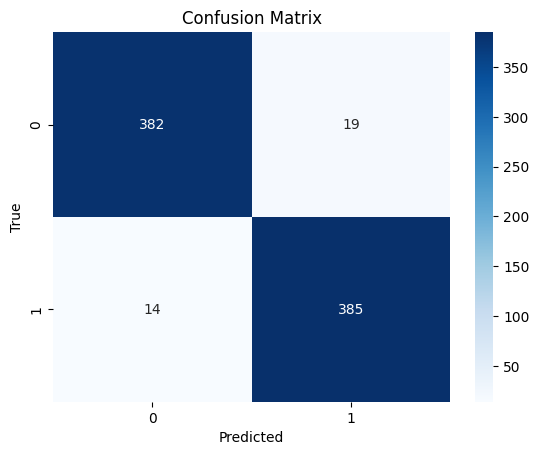

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       0.96      0.95      0.96       401
           1       0.95      0.96      0.96       399

    accuracy                           0.96       800
   macro avg       0.96      0.96      0.96       800
weighted avg       0.96      0.96      0.96       800



In [ ]:
import pandas as pd

# Assuming X_test and y_test are in pandas DataFrame and Series
errors = X_test[(predictions != y_test)]
errors['predicted'] = predictions[(predictions != y_test)]
errors['actual'] = y_test[(predictions != y_test)]

print(errors.head())  # Display first few error cases


          Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
70    0.610132 -3.460819   1.336759     0.387452  -0.136781  2.988646   
803  -1.071853 -1.496799  -0.303023     1.425078   2.183076  1.532804   
1822  0.622759 -4.196353   0.847013     0.431259  -0.302134  3.726932   
1992 -2.585616 -0.045807   0.870952    -0.136893  -0.037032  1.071864   
33   -0.588796 -1.121987   2.324295     0.311931   5.148739 -3.351988   

       Acidity  predicted  actual  
70   -2.044769          1       0  
803   1.433817          0       1  
1822 -1.188430          1       0  
1992  1.500015          0       1  
33    5.560109          1       0  


<ipython-input-5-ea3ecbc74afb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors['predicted'] = predictions[(predictions != y_test)]
<ipython-input-5-ea3ecbc74afb>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors['actual'] = y_test[(predictions != y_test)]


,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,predicted,actual
70,0.610132,-3.460819,1.336759,0.387452,-0.136781,2.988646,-2.044769,1,0
1822,0.622759,-4.196353,0.847013,0.431259,-0.302134,3.726932,-1.188430,1,0
33,-0.588796,-1.121987,2.324295,0.311931,5.148739,-3.351988,5.560109,1,0
3194,0.026097,3.010306,1.712530,1.754225,0.468184,-2.160814,4.902217,1,0
1731,1.416978,-0.450989,-2.499578,1.900472,1.729655,2.024357,-2.657512,1,0
598,0.080971,0.311422,2.102265,1.284845,1.434369,-3.740368,1.050908,1,0
2758,-3.615633,-0.425489,1.209044,0.515604,1.166596,-1.149619,-2.789929,1,0
3225,2.849105,-0.810499,-1.769152,0.863339,1.332378,0.049158,1.185050,1,0
2053,0.302576,-2.011767,1.900143,0.533090,1.703285,1.261360,-0.449605,1,0
2256,0.481871,2.273680,-1.456168,2.452204,0.046173,-1.234474,-1.005574,1,0


RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

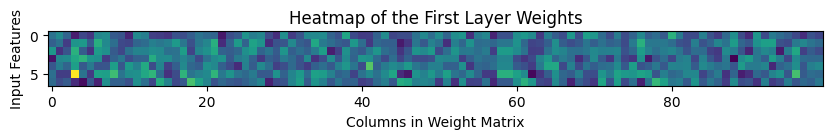

In [ ]:
#Visualization of first layer weights. Probably not super valuable.
fig, ax = plt.subplots(figsize=(10, 8))
ax.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.title('Heatmap of the First Layer Weights')
plt.xlabel('Columns in Weight Matrix')
plt.ylabel('Input Features')
plt.colorbar()
plt.show()


In [ ]:
#Let's try some hyperparameter tuning
#This gives great results. Messing around with max_iter is important.
#Maybe randomforestclassifier caps out around 91% or something.
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

# It's often a good practice to scale your data for neural network models
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
for x in range(50, 1000, 50):
  # Initialize MLPClassifier
  # This is a basic setup. You might need to tune the hyperparameters like hidden_layer_sizes, learning_rate_init, etc.
  mlp = MLPClassifier(hidden_layer_sizes=(x,), max_iter=2000, activation='relu', solver='adam', random_state=42)

  # Fit the model
  mlp.fit(X_train_scaled, y_train)

  # Make predictions
  predictions = mlp.predict(X_test_scaled)

  # Evaluate the model
  print(x)
  accuracy = accuracy_score(y_test, predictions)
  print(f"Model accuracy: {accuracy:.2f}")

50
Model accuracy: 0.93
100
Model accuracy: 0.96
150
Model accuracy: 0.95


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


200
Model accuracy: 0.95
250
Model accuracy: 0.95
300
Model accuracy: 0.96
350
Model accuracy: 0.95
400
Model accuracy: 0.95
450
Model accuracy: 0.95
500
Model accuracy: 0.95
550
Model accuracy: 0.95
600
Model accuracy: 0.95
650
Model accuracy: 0.95
700
Model accuracy: 0.95


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


750
Model accuracy: 0.96


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


800
Model accuracy: 0.91


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


850
Model accuracy: 0.95


In [ ]:
#Let's try some hyperparameter tuning
#This gives great results. Messing around with max_iter is important.
#Maybe randomforestclassifier caps out around 91% or something.
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

# It's often a good practice to scale your data for neural network models
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
for x in range(1000, 5000, 250):
  # Initialize MLPClassifier
  # This is a basic setup. You might need to tune the hyperparameters like hidden_layer_sizes, learning_rate_init, etc.
  mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=x, activation='relu', solver='adam', random_state=42)

  # Fit the model
  mlp.fit(X_train_scaled, y_train)

  # Make predictions
  predictions = mlp.predict(X_test_scaled)

  # Evaluate the model
  print(x)
  accuracy = accuracy_score(y_test, predictions)
  print(f"Model accuracy: {accuracy:.2f}")

In [ ]:
#It seems like max_iter and hidden_layer_sizes are basically optimized.
#I want to see what happens if I take out some outliers.

In [ ]:
#Let's mess around with getting rid of outliers.
import pandas as pd
from scipy.stats import zscore

df = data

z_scores = df.apply(zscore)

# Filter rows where any feature's Z-score is greater than 3
filtered_df = df[(z_scores.abs() <= 2.5).all(axis=1)]

In [ ]:
data.shape

In [ ]:
filtered_df.shape

In [ ]:
features = filtered_df[['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']]
target = filtered_df['Good']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [ ]:
#This gives great results. Messing around with max_iter is important.
#Maybe randomforestclassifier caps out around 91% or something.
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

# It's often a good practice to scale your data for neural network models
scaler = StandardScaler()
poly = PolynomialFeatures(degree=2)
X_train = scaler.fit_transform(X_train)
X_train = poly.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_test = poly.transform(X_test)

# Initialize MLPClassifier
# This is a basic setup. You might need to tune the hyperparameters like hidden_layer_sizes, learning_rate_init, etc.
mlp = MLPClassifier(hidden_layer_sizes=(100,), alpha=0.0001, max_iter=2000, activation='relu', solver='adam', random_state=42)

# Fit the model
mlp.fit(X_train_scaled, y_train)

# Make predictions
predictions = mlp.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f"Model accuracy: {accuracy: f}")

Model accuracy:  0.932500


In [ ]:
#Tried with a variety of z scores outlier elimination. Nothing really worked.
#experimented with solver, activation, max_iter, and hidden_layer_sizes values. Can't seem to find anything to beat it.

In [ ]:
parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': 'relu',
    'solver': 'adam',
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [ ]:
data.shape

In [ ]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
clf.fit(X_train, y_train)

In [ ]:
means = clf.cv_results_['mean_test_score']

In [ ]:
# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# It's often a good practice to scale your data for neural network models
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize MLPClassifier
# This is a basic setup. You might need to tune the hyperparameters like hidden_layer_sizes, learning_rate_init, etc.
mlp = MLPClassifier(hidden_layer_sizes=(100,), alpha=0.0002, max_iter=2000, activation='relu', solver='adam', random_state=42)

# Fit the model
mlp.fit(X_train_scaled, y_train)

# Make predictions
predictions = mlp.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f"Model accuracy: {accuracy: f}")


In [ ]:
#MinMax Scaling doesn't seem to work at all. Neither did Robust Scaling, which makes sense.
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# It's often a good practice to scale your data for neural network models
scaler = StandardScaler()

# Initialize PCA - Let's start with using 5 components
pca = PCA(n_components=7)

# Combine the scaler and PCA in a pipeline
preprocessing_pipeline = Pipeline([
    ('scaler', scaler),
    ('pca', pca)
])

# Apply the preprocessing pipeline to training and test data
X_train_prepared = preprocessing_pipeline.fit_transform(X_train)
X_test_prepared = preprocessing_pipeline.transform(X_test)

# Initialize MLPClassifier
# This is a basic setup. You might need to tune the hyperparameters like hidden_layer_sizes, learning_rate_init, etc.
mlp = MLPClassifier(hidden_layer_sizes=(100,), alpha=0.0002, max_iter=2000, activation='relu', solver='adam', random_state=42)

# Fit the model
mlp.fit(X_train_prepared, y_train)

# Make predictions
predictions = mlp.predict(X_test_prepared)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f"Model accuracy: {accuracy:.4f}")


Polynomial Features didn't yield much success.

Below, I ran my seemingly lucky model with 10 different seeds.

Was it just a lucky model? Looks like it.

In [ ]:
#This gives great results. Messing around with max_iter is important.
#Maybe randomforestclassifier caps out around 91% or something.
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

# It's often a good practice to scale your data for neural network models
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize MLPClassifier
for x in range(10):
    mlp = MLPClassifier(hidden_layer_sizes=(100), alpha=0.0002, max_iter=2000, activation='relu', solver='adam', random_state=42 + x)

    # Fit the model
    mlp.fit(X_train_scaled, y_train)

    # Make predictions
    predictions = mlp.predict(X_test_scaled)

    # Evaluate the model
    accuracy = accuracy_score(y_test, predictions)
    print(f"Model accuracy: {accuracy: f}")

#Maybe everything is meaningless and my life is a lie. Maybe we spend our lives chasing imaginary stories and false patterns.
#Maybe part of the trick of life is deluding yourself into thinking you're moving somewhere, when we're all just tilting at windmills.


Model accuracy:  0.958750


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Model accuracy:  0.907500
Model accuracy:  0.952500
Model accuracy:  0.941250
Model accuracy:  0.941250
Model accuracy:  0.956250
Model accuracy:  0.943750
Model accuracy:  0.937500
Model accuracy:  0.950000
Model accuracy:  0.956250


## Sequential Models Using Tensorflow Keras

Started Small

In [ ]:
import tensorflow as tf
# Create the model
model = tf.keras.Sequential([
                      tf.keras.layers.Dense(128, activation='relu'),
                  tf.keras.layers.Dense(512, activation='relu'),
                 tf.keras.layers.Dense(512, activation='relu'),
                  tf.keras.layers.Dense(1, activation='sigmoid')
 ])
# Compile the model
model.compile(loss="binary_crossentropy",
              optimizer="Adam",
              metrics=["accuracy"])
# Fit the model
history = model.fit(X_train,
                    y_train,
                    epochs=500,
                    validation_data=(X_test, y_test),
                    verbose=0)
model.evaluate(X_test_scaled, y_test)


25/25 [==============================] - 0s 2ms/step - loss: 4.2672 - accuracy: 0.7275


[4.267166614532471, 0.7275000214576721]

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2


# Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation="relu", kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    tf.keras.layers.Dense(256, activation="relu", kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    tf.keras.layers.Dense(128, activation="relu", kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model.compile(loss="binary_crossentropy",
              optimizer="Adam",
              metrics=["accuracy"])

# Fit the model
history = model.fit(X_train_scaled,
                    y_train,
                    epochs=2000,
                    validation_data=(X_test_scaled, y_test),
                    verbose=0)
model.evaluate(X_test_scaled, y_test)

KeyboardInterrupt: 

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2

class DataAugmentationLayer(tf.keras.layers.Layer):
    def __init__(self, noise_level=0.1, **kwargs):
        super().__init__(**kwargs)
        self.noise_level = noise_level

    def call(self, inputs, training=None):
        if training:
            noise = tf.random.normal(shape=tf.shape(inputs), mean=0.0, stddev=self.noise_level)
            return inputs + noise
        return inputs
# Create the model
model = tf.keras.Sequential([
        DataAugmentationLayer(noise_level=0.05),
    tf.keras.layers.Dense(128, activation="relu", kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    tf.keras.layers.Dense(512, activation="relu", kernel_regularizer=l2(0.01)),
    Dropout(0.5),
         tf.keras.layers.Dense(256, activation="relu", kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    tf.keras.layers.Dense(128, activation="relu", kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model.compile(loss="binary_crossentropy",
              optimizer="Adam",
              metrics=["accuracy"])

# Fit the model
history = model.fit(X_train_scaled,
                    y_train,
                    epochs=300,
                    validation_data=(X_test_scaled, y_test),
                    verbose=0)
model.evaluate(X_test_scaled, y_test)

25/25 [==============================] - 0s 2ms/step - loss: 0.3188 - accuracy: 0.9337


[0.31878870725631714, 0.9337499737739563]

In [ ]:
model.evaluate(X_test_scaled, y_test)


25/25 [==============================] - 0s 2ms/step - loss: 0.2834 - accuracy: 0.9400


[0.28336623311042786, 0.9399999976158142]

In [ ]:
#data augmentation
#Obvious note for a noob: If it performs at 28% accuracy on the training data, it's not trained.

from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
import numpy as np
from sklearn.utils import shuffle

# It's often a good practice to scale your data for neural network models
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize MLPClassifier
# This is a basic setup. You might need to tune the hyperparameters like hidden_layer_sizes, learning_rate_init, etc.
mlp = MLPClassifier(hidden_layer_sizes=(100), alpha=0.0002, max_iter=4000, activation='relu', solver='adam', random_state=42)


def augment_data(X, method='noise', noise_level=0.01, jitter_factor=0.01):
    if method == 'noise':
        noise = noise_level * np.random.randn(*X.shape)
        return X + noise
    elif method == 'jitter':
        jitter = np.random.uniform(-jitter_factor, jitter_factor, X.shape)
        return X + jitter * X
    elif method == 'scaling_shifting':
        scaling_factor = np.random.uniform(0.9, 1.1, X.shape[1])
        shifting_factor = np.random.uniform(-0.1, 0.1, X.shape[1])
        return X * scaling_factor + shifting_factor
    else:
        return X

# Augment data
X_train_augmented = augment_data(X_train_scaled, method='scaling_and_shifting')

X_train_augmented = np.vstack([X_train_scaled, X_train_augmented])

y_train_augmented = np.hstack([y_train, y_train])  # Duplicate y_train

# Shuffle the augmented dataset
X_train_augmented, y_train_augmented = shuffle(X_train_augmented, y_train_augmented)

# Fit model on augmented data
mlp.fit(X_train_augmented, y_train_augmented)

# Make predictions
predictions = mlp.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f"Model accuracy: {accuracy: f}")

Model accuracy:  0.950000


In [ ]:
X_train.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
3994,1.482508,-2.581181,-0.306888,1.527877,1.056361,2.560829,-1.229255
423,-0.166097,0.385633,-1.102875,0.473802,0.325483,0.983244,-2.171938
2991,-2.508892,-2.843436,-0.848363,-0.483352,-0.095337,5.111046,-1.805348
1221,-1.380463,-0.521432,3.335713,0.143991,2.513751,-0.466679,-0.030533
506,-2.073640,-1.212834,-0.818440,3.808835,1.013863,0.748661,0.026134


In [ ]:
X_train_augmented.shape

(6400, 7)

In [ ]:
X_test.shape

(800, 7)

In [ ]:
#in the above, the results are not reproducible because i'm not using a numpy random seed.

In [ ]:
!pip install xgboost

In [ ]:
#Imma try xgbclassifier.
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

# It's often a good practice to scale your data for neural network models
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from xgboost import XGBClassifier

# Create an instance of the XGBClassifier
model = XGBClassifier(
    objective='binary:logistic',  # Use 'multi:softmax' for multiclass and set `num_class`
    n_estimators=1000,  # Number of trees
    learning_rate=0.01,  # Step size shrinkage
    max_depth=50,
    seed=42  # Random seed for reproducibility
)

# Fit the model on the training data
model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=50, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Predictions on test data
y_pred = model.predict(X_test)

# Evaluate the predictions
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.91375
Confusion Matrix:
 [[364  37]
 [ 32 367]]


In [ ]:
#Let's grab that original data, without the buckets.
import pandas as pd
#Let's perform a super simple and easy Random Forest Classifier.
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/IBM Advanced Data Science Cap/data/cleaned_data.csv")
features = data[['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']]
target = data['Good']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [ ]:
#Obstacles: I accidentally used the wrong data at some point. It was iris data.
#I also accidentally messed up my data because jupyter notebooks kind of make that easy. And I didn't realize that. So I was working with data that just didn't work very well.
#When doing gridsearchcv, I should've used list comprehension to make the list. Instead, I manually typed it out and made a typo.

In [ ]:
#ugh
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score


# Preprocess the numerical features by scaling them and adding polynomial features
scaler = StandardScaler()
poly = PolynomialFeatures(degree=2)
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = poly.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_test_scaled = poly.transform(X_test)

# Define the hyperparameter grid for logistic regression
'''param_grid = {'C': [0.1, 0.5, 1, 5, 10],
              'penalty': ['l1', 'l2'],
              'solver': ['liblinear', 'saga'],
              'max_iter': [i for i in range(500, 5000, 10000)]}'''

param_grid = {'C': [0.1, 0.5, 1, 5, 10],
              'penalty': ['l1'],
              'solver': ['liblinear'],
              'max_iter': [1000]}

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=5, scoring='accuracy', verbose=10)
grid_search.fit(X_train_scaled, y_train)

# Train a logistic regression model with the best hyperparameters
best_model = grid_search.best_estimator_
best_model.fit(X_train_scaled, y_train)

# Predict on the testing set
y_pred = best_model.predict(X_test_scaled)
y_prob = best_model.predict_proba(X_test_scaled)[:,1]

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print(f'Best hyperparameters: {grid_search.best_params_}')
print(f'Accuracy: {accuracy}')
print(f'Confusion matrix: \n{confusion}')
print(f'ROC AUC score: {roc_auc}')

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5; 1/5] START C=0.1, max_iter=1000, penalty=l1, solver=liblinear..........
[CV 1/5; 1/5] END C=0.1, max_iter=1000, penalty=l1, solver=liblinear;, score=0.869 total time=   0.0s
[CV 2/5; 1/5] START C=0.1, max_iter=1000, penalty=l1, solver=liblinear..........
[CV 2/5; 1/5] END C=0.1, max_iter=1000, penalty=l1, solver=liblinear;, score=0.856 total time=   0.0s
[CV 3/5; 1/5] START C=0.1, max_iter=1000, penalty=l1, solver=liblinear..........
[CV 3/5; 1/5] END C=0.1, max_iter=1000, penalty=l1, solver=liblinear;, score=0.856 total time=   0.0s
[CV 4/5; 1/5] START C=0.1, max_iter=1000, penalty=l1, solver=liblinear..........
[CV 4/5; 1/5] END C=0.1, max_iter=1000, penalty=l1, solver=liblinear;, score=0.872 total time=   0.0s
[CV 5/5; 1/5] START C=0.1, max_iter=1000, penalty=l1, solver=liblinear..........
[CV 5/5; 1/5] END C=0.1, max_iter=1000, penalty=l1, solver=liblinear;, score=0.880 total time=   0.0s
[CV 1/5; 2/5] START C=0.5

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score


# It's often a good practice to scale your data for neural network models
scaler = StandardScaler()
poly = PolynomialFeatures(degree=2)
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = poly.fit_transform(X_train_scaled)
X_test_scaled = scaler.transform(X_test)
X_test_scaled = poly.transform(X_test_scaled)

# Define the hyperparameter grid for MLPClassifier
param_grid = {
    'alpha': [i * pow(10, -5) for i in range(5, 30, 5)],
    'max_iter': [i for i in range(100, 1000, 150)],
}

# Configure GridSearchCV
grid_search = GridSearchCV(MLPClassifier(alpha=0.0001, hidden_layer_sizes=(100,), activation='relu', solver='adam', random_state=42),
                           param_grid, scoring='accuracy', cv=3, verbose=10)

# Fit GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Review the results
print("Best parameters:", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

# Use the best model
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f"Model accuracy: {accuracy:.4f}")


Fitting 3 folds for each of 30 candidates, totalling 90 fits
[CV 1/3; 1/30] START alpha=5e-05, max_iter=100..................................


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3; 1/30] END ...alpha=5e-05, max_iter=100;, score=0.894 total time=   1.3s
[CV 2/3; 1/30] START alpha=5e-05, max_iter=100..................................


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3; 1/30] END ...alpha=5e-05, max_iter=100;, score=0.926 total time=   1.2s
[CV 3/3; 1/30] START alpha=5e-05, max_iter=100..................................


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3; 1/30] END ...alpha=5e-05, max_iter=100;, score=0.925 total time=   1.2s
[CV 1/3; 2/30] START alpha=5e-05, max_iter=250..................................


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3; 2/30] END ...alpha=5e-05, max_iter=250;, score=0.909 total time=   2.9s
[CV 2/3; 2/30] START alpha=5e-05, max_iter=250..................................


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3; 2/30] END ...alpha=5e-05, max_iter=250;, score=0.934 total time=   3.0s
[CV 3/3; 2/30] START alpha=5e-05, max_iter=250..................................


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3; 2/30] END ...alpha=5e-05, max_iter=250;, score=0.936 total time=   3.6s
[CV 1/3; 3/30] START alpha=5e-05, max_iter=400..................................


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3; 3/30] END ...alpha=5e-05, max_iter=400;, score=0.899 total time=   4.8s
[CV 2/3; 3/30] START alpha=5e-05, max_iter=400..................................


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3; 3/30] END ...alpha=5e-05, max_iter=400;, score=0.934 total time=   4.6s
[CV 3/3; 3/30] START alpha=5e-05, max_iter=400..................................


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3; 3/30] END ...alpha=5e-05, max_iter=400;, score=0.931 total time=   5.9s
[CV 1/3; 4/30] START alpha=5e-05, max_iter=550..................................
[CV 1/3; 4/30] END ...alpha=5e-05, max_iter=550;, score=0.899 total time=   5.9s
[CV 2/3; 4/30] START alpha=5e-05, max_iter=550..................................


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (550) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3; 4/30] END ...alpha=5e-05, max_iter=550;, score=0.932 total time=   7.4s
[CV 3/3; 4/30] START alpha=5e-05, max_iter=550..................................
[CV 3/3; 4/30] END ...alpha=5e-05, max_iter=550;, score=0.932 total time=   6.3s
[CV 1/3; 5/30] START alpha=5e-05, max_iter=700..................................
[CV 1/3; 5/30] END ...alpha=5e-05, max_iter=700;, score=0.899 total time=   7.1s
[CV 2/3; 5/30] START alpha=5e-05, max_iter=700..................................
[CV 2/3; 5/30] END ...alpha=5e-05, max_iter=700;, score=0.932 total time=   9.5s
[CV 3/3; 5/30] START alpha=5e-05, max_iter=700..................................
[CV 3/3; 5/30] END ...alpha=5e-05, max_iter=700;, score=0.932 total time=   7.6s
[CV 1/3; 6/30] START alpha=5e-05, max_iter=850..................................
[CV 1/3; 6/30] END ...alpha=5e-05, max_iter=850;, score=0.899 total time=   6.2s
[CV 2/3; 6/30] START alpha=5e-05, max_iter=850..................................
[CV 2/3; 6/30] END ...alpha=

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3; 7/30] END ..alpha=0.0001, max_iter=100;, score=0.895 total time=   1.5s
[CV 2/3; 7/30] START alpha=0.0001, max_iter=100.................................


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3; 7/30] END ..alpha=0.0001, max_iter=100;, score=0.925 total time=   1.2s
[CV 3/3; 7/30] START alpha=0.0001, max_iter=100.................................


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3; 7/30] END ..alpha=0.0001, max_iter=100;, score=0.923 total time=   1.2s
[CV 1/3; 8/30] START alpha=0.0001, max_iter=250.................................


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3; 8/30] END ..alpha=0.0001, max_iter=250;, score=0.907 total time=   3.0s
[CV 2/3; 8/30] START alpha=0.0001, max_iter=250.................................


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3; 8/30] END ..alpha=0.0001, max_iter=250;, score=0.935 total time=   2.9s
[CV 3/3; 8/30] START alpha=0.0001, max_iter=250.................................


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3; 8/30] END ..alpha=0.0001, max_iter=250;, score=0.934 total time=   3.3s
[CV 1/3; 9/30] START alpha=0.0001, max_iter=400.................................


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3; 9/30] END ..alpha=0.0001, max_iter=400;, score=0.901 total time=   5.4s
[CV 2/3; 9/30] START alpha=0.0001, max_iter=400.................................


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3; 9/30] END ..alpha=0.0001, max_iter=400;, score=0.934 total time=   4.7s
[CV 3/3; 9/30] START alpha=0.0001, max_iter=400.................................


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3; 9/30] END ..alpha=0.0001, max_iter=400;, score=0.932 total time=   7.4s
[CV 1/3; 10/30] START alpha=0.0001, max_iter=550................................
[CV 1/3; 10/30] END .alpha=0.0001, max_iter=550;, score=0.902 total time=   7.7s
[CV 2/3; 10/30] START alpha=0.0001, max_iter=550................................


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (550) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3; 10/30] END .alpha=0.0001, max_iter=550;, score=0.931 total time=   7.5s
[CV 3/3; 10/30] START alpha=0.0001, max_iter=550................................
[CV 3/3; 10/30] END .alpha=0.0001, max_iter=550;, score=0.932 total time=   6.3s
[CV 1/3; 11/30] START alpha=0.0001, max_iter=700................................
[CV 1/3; 11/30] END .alpha=0.0001, max_iter=700;, score=0.902 total time=   7.5s
[CV 2/3; 11/30] START alpha=0.0001, max_iter=700................................
[CV 2/3; 11/30] END .alpha=0.0001, max_iter=700;, score=0.930 total time=   7.4s
[CV 3/3; 11/30] START alpha=0.0001, max_iter=700................................
[CV 3/3; 11/30] END .alpha=0.0001, max_iter=700;, score=0.932 total time=   7.0s
[CV 1/3; 12/30] START alpha=0.0001, max_iter=850................................
[CV 1/3; 12/30] END .alpha=0.0001, max_iter=850;, score=0.902 total time=   7.3s
[CV 2/3; 12/30] START alpha=0.0001, max_iter=850................................
[CV 2/3; 12/30] END .alpha=0

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


[CV 3/3; 12/30] END .alpha=0.0001, max_iter=850;, score=0.935 total time=   5.8s
[CV 1/3; 13/30] START alpha=0.00015000000000000001, max_iter=100................


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


[CV 1/3; 13/30] END alpha=0.00015000000000000001, max_iter=100;, score=0.893 total time=   1.2s
[CV 2/3; 13/30] START alpha=0.00015000000000000001, max_iter=100................


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


[CV 2/3; 13/30] END alpha=0.00015000000000000001, max_iter=100;, score=0.873 total time=   0.2s
[CV 3/3; 13/30] START alpha=0.00015000000000000001, max_iter=100................


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3; 13/30] END alpha=0.00015000000000000001, max_iter=100;, score=0.923 total time=   1.2s
[CV 1/3; 14/30] START alpha=0.00015000000000000001, max_iter=250................


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


[CV 1/3; 14/30] END alpha=0.00015000000000000001, max_iter=250;, score=0.909 total time=   2.4s
[CV 2/3; 14/30] START alpha=0.00015000000000000001, max_iter=250................


In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score


# It's often a good practice to scale your data for neural network models
scaler = StandardScaler()
poly = PolynomialFeatures(degree=2)
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = poly.fit_transform(X_train_scaled)
X_test_scaled = scaler.transform(X_test)
X_test_scaled = poly.transform(X_test_scaled)

# Define the hyperparameter grid for MLPClassifier
param_grid = {
    'max_iter': [i for i in range(1000, 5000, 500)]
}

# Configure GridSearchCV
grid_search = GridSearchCV(MLPClassifier(alpha=0.00005, hidden_layer_sizes=(100,), activation='relu', solver='adam', random_state=42),
                           param_grid, scoring='accuracy', cv=3, verbose=10)

# Fit GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Review the results
print("Best parameters:", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

# Use the best model
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f"Model accuracy: {accuracy:.4f}")


Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV 1/3; 1/8] START max_iter=1000...............................................
[CV 1/3; 1/8] END ................max_iter=1000;, score=0.899 total time=   6.5s
[CV 2/3; 1/8] START max_iter=1000...............................................
[CV 2/3; 1/8] END ................max_iter=1000;, score=0.932 total time=   8.1s
[CV 3/3; 1/8] START max_iter=1000...............................................
[CV 3/3; 1/8] END ................max_iter=1000;, score=0.932 total time=   6.3s
[CV 1/3; 2/8] START max_iter=1500...............................................
[CV 1/3; 2/8] END ................max_iter=1500;, score=0.899 total time=   6.7s
[CV 2/3; 2/8] START max_iter=1500...............................................
[CV 2/3; 2/8] END ................max_iter=1500;, score=0.932 total time=   7.2s
[CV 3/3; 2/8] START max_iter=1500...............................................
[CV 3/3; 2/8] END ................max_iter=1500;,

In [ ]:
#same thing, trying with cv = 5.
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score


# It's often a good practice to scale your data for neural network models
scaler = StandardScaler()
poly = PolynomialFeatures(degree=2)
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = poly.fit_transform(X_train_scaled)
X_test_scaled = scaler.transform(X_test)
X_test_scaled = poly.transform(X_test_scaled)

# Define the hyperparameter grid for MLPClassifier
param_grid = {
    'max_iter': [i for i in range(1000, 5000, 500)]
}

# Configure GridSearchCV
grid_search = GridSearchCV(MLPClassifier(alpha=0.00005, hidden_layer_sizes=(100,), activation='relu', solver='adam', random_state=42),
                           param_grid, scoring='accuracy', cv=5, verbose=10)

# Fit GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Review the results
print("Best parameters:", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

# Use the best model
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f"Model accuracy: {accuracy:.4f}")


Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5; 1/8] START max_iter=1000...............................................
[CV 1/5; 1/8] END ................max_iter=1000;, score=0.898 total time=  13.2s
[CV 2/5; 1/8] START max_iter=1000...............................................
[CV 2/5; 1/8] END ................max_iter=1000;, score=0.923 total time=   9.8s
[CV 3/5; 1/8] START max_iter=1000...............................................
[CV 3/5; 1/8] END ................max_iter=1000;, score=0.925 total time=  10.1s
[CV 4/5; 1/8] START max_iter=1000...............................................
[CV 4/5; 1/8] END ................max_iter=1000;, score=0.923 total time=   9.9s
[CV 5/5; 1/8] START max_iter=1000...............................................
[CV 5/5; 1/8] END ................max_iter=1000;, score=0.934 total time=   9.7s
[CV 1/5; 2/8] START max_iter=1500...............................................
[CV 1/5; 2/8] END ................max_iter=1500;,

In [ ]:
#same thing, trying with cv = 5.
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score


# It's often a good practice to scale your data for neural network models
scaler = StandardScaler()
poly = PolynomialFeatures(degree=2)
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = poly.fit_transform(X_train_scaled)
X_test_scaled = scaler.transform(X_test)
X_test_scaled = poly.transform(X_test_scaled)

# Define the hyperparameter grid for MLPClassifier
param_grid = {
    'max_iter': [i for i in range(1000, 5000, 500)]
}

# Configure GridSearchCV
grid_search = GridSearchCV(MLPClassifier(alpha=0.0003, hidden_layer_sizes=(100,), activation='relu', solver='adam', random_state=42),
                           param_grid, scoring='accuracy', cv=5, verbose=10)

# Fit GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Review the results
print("Best parameters:", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

# Use the best model
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f"Model accuracy: {accuracy:.4f}")


Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5; 1/8] START max_iter=1000...............................................
[CV 1/5; 1/8] END ................max_iter=1000;, score=0.900 total time=   9.3s
[CV 2/5; 1/8] START max_iter=1000...............................................
[CV 2/5; 1/8] END ................max_iter=1000;, score=0.917 total time=   9.2s
[CV 3/5; 1/8] START max_iter=1000...............................................
[CV 3/5; 1/8] END ................max_iter=1000;, score=0.925 total time=   8.9s
[CV 4/5; 1/8] START max_iter=1000...............................................
[CV 4/5; 1/8] END ................max_iter=1000;, score=0.930 total time=   9.3s
[CV 5/5; 1/8] START max_iter=1000...............................................
[CV 5/5; 1/8] END ................max_iter=1000;, score=0.933 total time=   9.3s
[CV 1/5; 2/8] START max_iter=1500...............................................
[CV 1/5; 2/8] END ................max_iter=1500;,

In [ ]:
#same thing, trying with cv = 5.
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score


# It's often a good practice to scale your data for neural network models
scaler = StandardScaler()
poly = PolynomialFeatures(degree=2)
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = poly.fit_transform(X_train_scaled)
X_test_scaled = scaler.transform(X_test)
X_test_scaled = poly.transform(X_test_scaled)

# Define the hyperparameter grid for MLPClassifier
param_grid = {
    'max_iter': [i for i in range(100, 1000, 100)]
}

# Configure GridSearchCV
grid_search = GridSearchCV(MLPClassifier(alpha=0.0003, hidden_layer_sizes=(100,), activation='relu', solver='adam', random_state=42),
                           param_grid, scoring='accuracy', cv=5, verbose=10)

# Fit GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Review the results
print("Best parameters:", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

# Use the best model
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f"Model accuracy: {accuracy:.4f}")


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START max_iter=100................................................


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5; 1/9] END .................max_iter=100;, score=0.911 total time=   1.8s
[CV 2/5; 1/9] START max_iter=100................................................


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5; 1/9] END .................max_iter=100;, score=0.914 total time=   1.7s
[CV 3/5; 1/9] START max_iter=100................................................


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5; 1/9] END .................max_iter=100;, score=0.930 total time=   1.4s
[CV 4/5; 1/9] START max_iter=100................................................


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5; 1/9] END .................max_iter=100;, score=0.927 total time=   1.8s
[CV 5/5; 1/9] START max_iter=100................................................


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5; 1/9] END .................max_iter=100;, score=0.928 total time=   1.6s
[CV 1/5; 2/9] START max_iter=200................................................


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5; 2/9] END .................max_iter=200;, score=0.912 total time=   3.1s
[CV 2/5; 2/9] START max_iter=200................................................


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5; 2/9] END .................max_iter=200;, score=0.922 total time=   2.8s
[CV 3/5; 2/9] START max_iter=200................................................


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5; 2/9] END .................max_iter=200;, score=0.938 total time=   2.8s
[CV 4/5; 2/9] START max_iter=200................................................


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5; 2/9] END .................max_iter=200;, score=0.928 total time=   3.1s
[CV 5/5; 2/9] START max_iter=200................................................


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5; 2/9] END .................max_iter=200;, score=0.934 total time=   3.4s
[CV 1/5; 3/9] START max_iter=300................................................


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5; 3/9] END .................max_iter=300;, score=0.916 total time=   4.3s
[CV 2/5; 3/9] START max_iter=300................................................


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5; 3/9] END .................max_iter=300;, score=0.920 total time=   4.3s
[CV 3/5; 3/9] START max_iter=300................................................


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5; 3/9] END .................max_iter=300;, score=0.939 total time=   5.4s
[CV 4/5; 3/9] START max_iter=300................................................


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5; 3/9] END .................max_iter=300;, score=0.928 total time=   4.3s
[CV 5/5; 3/9] START max_iter=300................................................


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5; 3/9] END .................max_iter=300;, score=0.941 total time=   4.2s
[CV 1/5; 4/9] START max_iter=400................................................


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5; 4/9] END .................max_iter=400;, score=0.906 total time=   6.5s
[CV 2/5; 4/9] START max_iter=400................................................


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5; 4/9] END .................max_iter=400;, score=0.916 total time=   5.8s
[CV 3/5; 4/9] START max_iter=400................................................


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5; 4/9] END .................max_iter=400;, score=0.933 total time=   6.4s
[CV 4/5; 4/9] START max_iter=400................................................


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5; 4/9] END .................max_iter=400;, score=0.925 total time=   5.7s
[CV 5/5; 4/9] START max_iter=400................................................


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5; 4/9] END .................max_iter=400;, score=0.933 total time=   6.7s
[CV 1/5; 5/9] START max_iter=500................................................


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5; 5/9] END .................max_iter=500;, score=0.905 total time=   7.2s
[CV 2/5; 5/9] START max_iter=500................................................


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5; 5/9] END .................max_iter=500;, score=0.919 total time=   7.9s
[CV 3/5; 5/9] START max_iter=500................................................


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5; 5/9] END .................max_iter=500;, score=0.928 total time=   7.0s
[CV 4/5; 5/9] START max_iter=500................................................


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5; 5/9] END .................max_iter=500;, score=0.933 total time=   8.3s
[CV 5/5; 5/9] START max_iter=500................................................


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5; 5/9] END .................max_iter=500;, score=0.933 total time=   7.1s
[CV 1/5; 6/9] START max_iter=600................................................
[CV 1/5; 6/9] END .................max_iter=600;, score=0.900 total time=   8.5s
[CV 2/5; 6/9] START max_iter=600................................................


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5; 6/9] END .................max_iter=600;, score=0.917 total time=   9.0s
[CV 3/5; 6/9] START max_iter=600................................................
[CV 3/5; 6/9] END .................max_iter=600;, score=0.925 total time=   7.8s
[CV 4/5; 6/9] START max_iter=600................................................
[CV 4/5; 6/9] END .................max_iter=600;, score=0.930 total time=   9.2s
[CV 5/5; 6/9] START max_iter=600................................................


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5; 6/9] END .................max_iter=600;, score=0.934 total time=   9.4s
[CV 1/5; 7/9] START max_iter=700................................................
[CV 1/5; 7/9] END .................max_iter=700;, score=0.900 total time=   8.3s
[CV 2/5; 7/9] START max_iter=700................................................
[CV 2/5; 7/9] END .................max_iter=700;, score=0.917 total time=   9.3s
[CV 3/5; 7/9] START max_iter=700................................................
[CV 3/5; 7/9] END .................max_iter=700;, score=0.925 total time=   9.3s
[CV 4/5; 7/9] START max_iter=700................................................
[CV 4/5; 7/9] END .................max_iter=700;, score=0.930 total time=   8.2s
[CV 5/5; 7/9] START max_iter=700................................................
[CV 5/5; 7/9] END .................max_iter=700;, score=0.933 total time=  10.0s
[CV 1/5; 8/9] START max_iter=800................................................
[CV 1/5; 8/9] END ..........

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
#same thing, trying with cv = 5.
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score


# It's often a good practice to scale your data for neural network models
scaler = StandardScaler()
poly = PolynomialFeatures(degree=2)
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = poly.fit_transform(X_train_scaled)
X_test_scaled = scaler.transform(X_test)
X_test_scaled = poly.transform(X_test_scaled)

# Define the hyperparameter grid for MLPClassifier
param_grid = {
    'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005]
}

# Configure GridSearchCV
grid_search = GridSearchCV(MLPClassifier(max_iter=300, hidden_layer_sizes=(100,), activation='relu', solver='adam', random_state=42),
                           param_grid, scoring='accuracy', cv=5, verbose=10)

# Fit GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Review the results
print("Best parameters:", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

# Use the best model
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f"Model accuracy: {accuracy:.4f}")


Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5; 1/5] START alpha=0.0001................................................


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5; 1/5] END .................alpha=0.0001;, score=0.914 total time=   5.6s
[CV 2/5; 1/5] START alpha=0.0001................................................


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5; 1/5] END .................alpha=0.0001;, score=0.923 total time=   4.3s
[CV 3/5; 1/5] START alpha=0.0001................................................


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5; 1/5] END .................alpha=0.0001;, score=0.938 total time=   4.1s
[CV 4/5; 1/5] START alpha=0.0001................................................


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5; 1/5] END .................alpha=0.0001;, score=0.923 total time=   4.7s
[CV 5/5; 1/5] START alpha=0.0001................................................


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5; 1/5] END .................alpha=0.0001;, score=0.941 total time=   4.2s
[CV 1/5; 2/5] START alpha=0.0002................................................


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5; 2/5] END .................alpha=0.0002;, score=0.909 total time=   4.2s
[CV 2/5; 2/5] START alpha=0.0002................................................


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5; 2/5] END .................alpha=0.0002;, score=0.922 total time=   4.9s
[CV 3/5; 2/5] START alpha=0.0002................................................


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5; 2/5] END .................alpha=0.0002;, score=0.936 total time=   4.3s
[CV 4/5; 2/5] START alpha=0.0002................................................


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5; 2/5] END .................alpha=0.0002;, score=0.927 total time=   4.2s
[CV 5/5; 2/5] START alpha=0.0002................................................


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5; 2/5] END .................alpha=0.0002;, score=0.939 total time=   4.6s
[CV 1/5; 3/5] START alpha=0.0003................................................


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5; 3/5] END .................alpha=0.0003;, score=0.916 total time=   4.6s
[CV 2/5; 3/5] START alpha=0.0003................................................


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5; 3/5] END .................alpha=0.0003;, score=0.920 total time=   4.3s
[CV 3/5; 3/5] START alpha=0.0003................................................


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5; 3/5] END .................alpha=0.0003;, score=0.939 total time=   5.0s
[CV 4/5; 3/5] START alpha=0.0003................................................


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5; 3/5] END .................alpha=0.0003;, score=0.928 total time=   4.6s
[CV 5/5; 3/5] START alpha=0.0003................................................


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5; 3/5] END .................alpha=0.0003;, score=0.941 total time=   4.2s
[CV 1/5; 4/5] START alpha=0.0004................................................


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5; 4/5] END .................alpha=0.0004;, score=0.912 total time=   4.7s
[CV 2/5; 4/5] START alpha=0.0004................................................


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5; 4/5] END .................alpha=0.0004;, score=0.920 total time=   4.6s
[CV 3/5; 4/5] START alpha=0.0004................................................


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5; 4/5] END .................alpha=0.0004;, score=0.938 total time=   4.1s
[CV 4/5; 4/5] START alpha=0.0004................................................


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5; 4/5] END .................alpha=0.0004;, score=0.925 total time=   4.9s
[CV 5/5; 4/5] START alpha=0.0004................................................


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5; 4/5] END .................alpha=0.0004;, score=0.939 total time=   4.6s
[CV 1/5; 5/5] START alpha=0.0005................................................


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5; 5/5] END .................alpha=0.0005;, score=0.912 total time=   4.6s
[CV 2/5; 5/5] START alpha=0.0005................................................


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5; 5/5] END .................alpha=0.0005;, score=0.920 total time=   4.9s
[CV 3/5; 5/5] START alpha=0.0005................................................


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5; 5/5] END .................alpha=0.0005;, score=0.941 total time=   4.2s
[CV 4/5; 5/5] START alpha=0.0005................................................


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5; 5/5] END .................alpha=0.0005;, score=0.920 total time=   4.1s
[CV 5/5; 5/5] START alpha=0.0005................................................


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5; 5/5] END .................alpha=0.0005;, score=0.939 total time=   5.5s
Best parameters: {'alpha': 0.0003}
Best score:  0.92875
Model accuracy: 0.9363


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
#turns out there's not much of a point to this.
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score


# It's often a good practice to scale your data for neural network models
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the hyperparameter grid for MLPClassifier
param_grid = {
    'random_state': [i for i in range(100)]
}

# Configure GridSearchCV
grid_search = GridSearchCV(MLPClassifier(max_iter=2000, alpha=0.0002, hidden_layer_sizes=(100,), activation='relu', solver='adam', random_state=42),
                           param_grid, scoring='accuracy', cv=2, verbose=10)

# Fit GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Review the results
print("Best parameters:", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

# Use the best model
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f"Model accuracy: {accuracy:.4f}")


Fitting 2 folds for each of 100 candidates, totalling 200 fits
[CV 1/2; 1/100] START random_state=0............................................
[CV 1/2; 1/100] END .............random_state=0;, score=0.914 total time=  11.9s
[CV 2/2; 1/100] START random_state=0............................................
[CV 2/2; 1/100] END .............random_state=0;, score=0.939 total time=  12.9s
[CV 1/2; 2/100] START random_state=1............................................
[CV 1/2; 2/100] END .............random_state=1;, score=0.915 total time=  12.2s
[CV 2/2; 2/100] START random_state=1............................................
[CV 2/2; 2/100] END .............random_state=1;, score=0.924 total time=  14.8s
[CV 1/2; 3/100] START random_state=2............................................
[CV 1/2; 3/100] END .............random_state=2;, score=0.922 total time=  13.0s
[CV 2/2; 3/100] START random_state=2............................................
[CV 2/2; 3/100] END .............random_state=

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


[CV 2/2; 20/100] END ...........random_state=19;, score=0.922 total time=   7.9s
[CV 1/2; 21/100] START random_state=20..........................................


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


[CV 1/2; 21/100] END ...........random_state=20;, score=0.876 total time=   2.2s
[CV 2/2; 21/100] START random_state=20..........................................
[CV 2/2; 21/100] END ...........random_state=20;, score=0.839 total time=   0.2s
[CV 1/2; 22/100] START random_state=21..........................................


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


[CV 1/2; 22/100] END ...........random_state=21;, score=0.882 total time=   1.6s
[CV 2/2; 22/100] START random_state=21..........................................


In [ ]:
#turns out there's not much of a point to this.
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score


# It's often a good practice to scale your data for neural network models
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the hyperparameter grid for MLPClassifier
param_grid = {
    'max_iter': [2000],
    'alpha': [0.0002],
    'learning_rate_init': [0.001, 0.002, 0.003],
    'beta_1': [0.9, 0.95],  # Slightly narrow range around a typical value
    'beta_2': [0.999, 0.9995]  # Reduced levels for beta_2
}


# Configure GridSearchCV
grid_search = GridSearchCV(MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', random_state=42),
                           param_grid, scoring='accuracy', cv=5, verbose=3)

# Fit GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Review the results
print("Best parameters:", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

# Use the best model
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f"Model accuracy: {accuracy:.4f}")


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END alpha=0.0002, beta_1=0.9, beta_2=0.999, learning_rate_init=0.001, max_iter=2000;, score=0.928 total time=  17.3s
[CV 2/5] END alpha=0.0002, beta_1=0.9, beta_2=0.999, learning_rate_init=0.001, max_iter=2000;, score=0.939 total time=  14.8s
[CV 3/5] END alpha=0.0002, beta_1=0.9, beta_2=0.999, learning_rate_init=0.001, max_iter=2000;, score=0.941 total time=  11.7s
[CV 4/5] END alpha=0.0002, beta_1=0.9, beta_2=0.999, learning_rate_init=0.001, max_iter=2000;, score=0.944 total time=  13.1s
[CV 5/5] END alpha=0.0002, beta_1=0.9, beta_2=0.999, learning_rate_init=0.001, max_iter=2000;, score=0.947 total time=  16.6s
[CV 1/5] END alpha=0.0002, beta_1=0.9, beta_2=0.999, learning_rate_init=0.002, max_iter=2000;, score=0.927 total time=   8.5s
[CV 2/5] END alpha=0.0002, beta_1=0.9, beta_2=0.999, learning_rate_init=0.002, max_iter=2000;, score=0.927 total time=   8.2s
[CV 3/5] END alpha=0.0002, beta_1=0.9, beta_2=0.999, lear

In [ ]:
#turns out there's not much of a point to this.
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score


# It's often a good practice to scale your data for neural network models
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the hyperparameter grid for MLPClassifier
param_grid = {
    'max_iter': [500, 1000, 1500, 2000, 2500, 3000, 3500],
    'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009, 0.001]
}


# Configure GridSearchCV
grid_search = GridSearchCV(MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', random_state=42),
                           param_grid, scoring='accuracy', cv=5, verbose=3)

# Fit GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Review the results
print("Best parameters:", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

# Use the best model
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f"Model accuracy: {accuracy:.4f}")

Fitting 5 folds for each of 70 candidates, totalling 350 fits


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END ........alpha=0.0001, max_iter=500;, score=0.919 total time=  16.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END ........alpha=0.0001, max_iter=500;, score=0.923 total time=   8.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END ........alpha=0.0001, max_iter=500;, score=0.930 total time=   7.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END ........alpha=0.0001, max_iter=500;, score=0.936 total time=   7.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END ........alpha=0.0001, max_iter=500;, score=0.936 total time=   6.8s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END .......alpha=0.0001, max_iter=1000;, score=0.925 total time=  14.3s
[CV 2/5] END .......alpha=0.0001, max_iter=1000;, score=0.928 total time=   9.8s
[CV 3/5] END .......alpha=0.0001, max_iter=1000;, score=0.944 total time=  12.9s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END .......alpha=0.0001, max_iter=1000;, score=0.942 total time=  14.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END .......alpha=0.0001, max_iter=1000;, score=0.941 total time=  15.0s
[CV 1/5] END .......alpha=0.0001, max_iter=1500;, score=0.925 total time=  15.7s
[CV 2/5] END .......alpha=0.0001, max_iter=1500;, score=0.928 total time=  10.2s
[CV 3/5] END .......alpha=0.0001, max_iter=1500;, score=0.944 total time=  13.1s
[CV 4/5] END .......alpha=0.0001, max_iter=1500;, score=0.950 total time=  15.1s
[CV 5/5] END .......alpha=0.0001, max_iter=1500;, score=0.941 total time=  18.2s
[CV 1/5] END .......alpha=0.0001, max_iter=2000;, score=0.925 total time=  15.2s
[CV 2/5] END .......alpha=0.0001, max_iter=2000;, score=0.928 total time=  10.0s
[CV 3/5] END .......alpha=0.0001, max_iter=2000;, score=0.944 total time=  13.5s
[CV 4/5] END .......alpha=0.0001, max_iter=2000;, score=0.950 total time=  14.7s
[CV 5/5] END .......alpha=0.0001, max_iter=2000;, score=0.941 total time=  18.4s
[CV 1/5] END .......alpha=0.0001, max_iter=2500;, score=0.925 total time=  15.3s
[CV 2/5] END .......alpha=0.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END ........alpha=0.0002, max_iter=500;, score=0.917 total time=   6.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END ........alpha=0.0002, max_iter=500;, score=0.919 total time=   7.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END ........alpha=0.0002, max_iter=500;, score=0.930 total time=   6.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END ........alpha=0.0002, max_iter=500;, score=0.934 total time=   7.7s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END ........alpha=0.0002, max_iter=500;, score=0.934 total time=   6.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END .......alpha=0.0002, max_iter=1000;, score=0.927 total time=  14.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END .......alpha=0.0002, max_iter=1000;, score=0.934 total time=  13.8s
[CV 3/5] END .......alpha=0.0002, max_iter=1000;, score=0.941 total time=  13.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END .......alpha=0.0002, max_iter=1000;, score=0.945 total time=  14.8s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END .......alpha=0.0002, max_iter=1000;, score=0.938 total time=  14.1s
[CV 1/5] END .......alpha=0.0002, max_iter=1500;, score=0.928 total time=  16.8s
[CV 2/5] END .......alpha=0.0002, max_iter=1500;, score=0.939 total time=  15.9s
[CV 3/5] END .......alpha=0.0002, max_iter=1500;, score=0.941 total time=  13.5s
[CV 4/5] END .......alpha=0.0002, max_iter=1500;, score=0.944 total time=  14.8s
[CV 5/5] END .......alpha=0.0002, max_iter=1500;, score=0.947 total time=  18.4s
[CV 1/5] END .......alpha=0.0002, max_iter=2000;, score=0.928 total time=  17.5s
[CV 2/5] END .......alpha=0.0002, max_iter=2000;, score=0.939 total time=  15.2s
[CV 3/5] END .......alpha=0.0002, max_iter=2000;, score=0.941 total time=  13.0s
[CV 4/5] END .......alpha=0.0002, max_iter=2000;, score=0.944 total time=  14.7s
[CV 5/5] END .......alpha=0.0002, max_iter=2000;, score=0.947 total time=  17.5s
[CV 1/5] END .......alpha=0.0002, max_iter=2500;, score=0.928 total time=  15.8s
[CV 2/5] END .......alpha=0.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END ........alpha=0.0003, max_iter=500;, score=0.917 total time=   6.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END ........alpha=0.0003, max_iter=500;, score=0.922 total time=   7.8s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END ........alpha=0.0003, max_iter=500;, score=0.930 total time=   6.7s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END ........alpha=0.0003, max_iter=500;, score=0.934 total time=   7.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END ........alpha=0.0003, max_iter=500;, score=0.933 total time=   6.9s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END .......alpha=0.0003, max_iter=1000;, score=0.923 total time=  14.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END .......alpha=0.0003, max_iter=1000;, score=0.933 total time=  14.1s
[CV 3/5] END .......alpha=0.0003, max_iter=1000;, score=0.941 total time=  14.6s
[CV 4/5] END .......alpha=0.0003, max_iter=1000;, score=0.944 total time=  13.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END .......alpha=0.0003, max_iter=1000;, score=0.942 total time=  14.6s
[CV 1/5] END .......alpha=0.0003, max_iter=1500;, score=0.925 total time=  15.6s
[CV 2/5] END .......alpha=0.0003, max_iter=1500;, score=0.938 total time=  16.6s
[CV 3/5] END .......alpha=0.0003, max_iter=1500;, score=0.941 total time=  15.0s
[CV 4/5] END .......alpha=0.0003, max_iter=1500;, score=0.944 total time=  12.6s
[CV 5/5] END .......alpha=0.0003, max_iter=1500;, score=0.944 total time=  19.9s
[CV 1/5] END .......alpha=0.0003, max_iter=2000;, score=0.925 total time=  16.2s
[CV 2/5] END .......alpha=0.0003, max_iter=2000;, score=0.938 total time=  16.7s
[CV 3/5] END .......alpha=0.0003, max_iter=2000;, score=0.941 total time=  13.3s
[CV 4/5] END .......alpha=0.0003, max_iter=2000;, score=0.944 total time=  13.0s
[CV 5/5] END .......alpha=0.0003, max_iter=2000;, score=0.944 total time=  20.4s
[CV 1/5] END .......alpha=0.0003, max_iter=2500;, score=0.925 total time=  16.3s
[CV 2/5] END .......alpha=0.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END ........alpha=0.0004, max_iter=500;, score=0.917 total time=   7.8s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END ........alpha=0.0004, max_iter=500;, score=0.917 total time=   6.9s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END ........alpha=0.0004, max_iter=500;, score=0.928 total time=   7.7s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END ........alpha=0.0004, max_iter=500;, score=0.938 total time=   6.8s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END ........alpha=0.0004, max_iter=500;, score=0.931 total time=   7.9s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END .......alpha=0.0004, max_iter=1000;, score=0.927 total time=  14.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END .......alpha=0.0004, max_iter=1000;, score=0.938 total time=  14.3s
[CV 3/5] END .......alpha=0.0004, max_iter=1000;, score=0.942 total time=  14.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END .......alpha=0.0004, max_iter=1000;, score=0.945 total time=  14.7s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END .......alpha=0.0004, max_iter=1000;, score=0.941 total time=  14.5s
[CV 1/5] END .......alpha=0.0004, max_iter=1500;, score=0.925 total time=  17.0s
[CV 2/5] END .......alpha=0.0004, max_iter=1500;, score=0.939 total time=  16.8s
[CV 3/5] END .......alpha=0.0004, max_iter=1500;, score=0.942 total time=  13.7s
[CV 4/5] END .......alpha=0.0004, max_iter=1500;, score=0.950 total time=  14.3s
[CV 5/5] END .......alpha=0.0004, max_iter=1500;, score=0.942 total time=  17.0s
[CV 1/5] END .......alpha=0.0004, max_iter=2000;, score=0.925 total time=  16.4s
[CV 2/5] END .......alpha=0.0004, max_iter=2000;, score=0.939 total time=  15.5s
[CV 3/5] END .......alpha=0.0004, max_iter=2000;, score=0.942 total time=  13.0s
[CV 4/5] END .......alpha=0.0004, max_iter=2000;, score=0.950 total time=  15.2s
[CV 5/5] END .......alpha=0.0004, max_iter=2000;, score=0.942 total time=  16.7s
[CV 1/5] END .......alpha=0.0004, max_iter=2500;, score=0.925 total time=  16.1s
[CV 2/5] END .......alpha=0.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END ........alpha=0.0005, max_iter=500;, score=0.917 total time=   7.7s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END ........alpha=0.0005, max_iter=500;, score=0.922 total time=   6.8s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END ........alpha=0.0005, max_iter=500;, score=0.923 total time=   7.7s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END ........alpha=0.0005, max_iter=500;, score=0.938 total time=   6.8s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END ........alpha=0.0005, max_iter=500;, score=0.934 total time=   7.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END .......alpha=0.0005, max_iter=1000;, score=0.920 total time=  14.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END .......alpha=0.0005, max_iter=1000;, score=0.936 total time=  14.6s
[CV 3/5] END .......alpha=0.0005, max_iter=1000;, score=0.938 total time=  13.8s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END .......alpha=0.0005, max_iter=1000;, score=0.947 total time=  14.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END .......alpha=0.0005, max_iter=1000;, score=0.941 total time=  14.7s
[CV 1/5] END .......alpha=0.0005, max_iter=1500;, score=0.919 total time=  16.4s
[CV 2/5] END .......alpha=0.0005, max_iter=1500;, score=0.933 total time=  16.9s
[CV 3/5] END .......alpha=0.0005, max_iter=1500;, score=0.938 total time=  13.7s
[CV 4/5] END .......alpha=0.0005, max_iter=1500;, score=0.950 total time=  16.7s
[CV 5/5] END .......alpha=0.0005, max_iter=1500;, score=0.941 total time=  18.3s
[CV 1/5] END .......alpha=0.0005, max_iter=2000;, score=0.919 total time=  16.7s
[CV 2/5] END .......alpha=0.0005, max_iter=2000;, score=0.933 total time=  17.0s
[CV 3/5] END .......alpha=0.0005, max_iter=2000;, score=0.938 total time=  13.6s
[CV 4/5] END .......alpha=0.0005, max_iter=2000;, score=0.950 total time=  16.1s
[CV 5/5] END .......alpha=0.0005, max_iter=2000;, score=0.941 total time=  17.5s
[CV 1/5] END .......alpha=0.0005, max_iter=2500;, score=0.919 total time=  16.7s
[CV 2/5] END .......alpha=0.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END .........alpha=0.006, max_iter=500;, score=0.919 total time=   7.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END .........alpha=0.006, max_iter=500;, score=0.920 total time=   7.7s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END .........alpha=0.006, max_iter=500;, score=0.928 total time=   6.9s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END .........alpha=0.006, max_iter=500;, score=0.938 total time=   7.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END .........alpha=0.006, max_iter=500;, score=0.933 total time=   7.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END ........alpha=0.006, max_iter=1000;, score=0.928 total time=  14.5s
[CV 2/5] END ........alpha=0.006, max_iter=1000;, score=0.925 total time=  13.4s
[CV 3/5] END ........alpha=0.006, max_iter=1000;, score=0.941 total time=  13.9s
[CV 4/5] END ........alpha=0.006, max_iter=1000;, score=0.947 total time=  14.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END ........alpha=0.006, max_iter=1000;, score=0.939 total time=  15.2s
[CV 1/5] END ........alpha=0.006, max_iter=1500;, score=0.928 total time=  16.8s
[CV 2/5] END ........alpha=0.006, max_iter=1500;, score=0.925 total time=  12.4s
[CV 3/5] END ........alpha=0.006, max_iter=1500;, score=0.941 total time=  13.6s
[CV 4/5] END ........alpha=0.006, max_iter=1500;, score=0.947 total time=  14.0s
[CV 5/5] END ........alpha=0.006, max_iter=1500;, score=0.944 total time=  16.2s
[CV 1/5] END ........alpha=0.006, max_iter=2000;, score=0.928 total time=  16.5s
[CV 2/5] END ........alpha=0.006, max_iter=2000;, score=0.925 total time=  12.6s
[CV 3/5] END ........alpha=0.006, max_iter=2000;, score=0.941 total time=  13.5s
[CV 4/5] END ........alpha=0.006, max_iter=2000;, score=0.947 total time=  13.4s
[CV 5/5] END ........alpha=0.006, max_iter=2000;, score=0.944 total time=  16.5s
[CV 1/5] END ........alpha=0.006, max_iter=2500;, score=0.928 total time=  16.5s
[CV 2/5] END ........alpha=0

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END ........alpha=0.0007, max_iter=500;, score=0.919 total time=   7.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END ........alpha=0.0007, max_iter=500;, score=0.923 total time=   6.8s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END ........alpha=0.0007, max_iter=500;, score=0.931 total time=   7.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END ........alpha=0.0007, max_iter=500;, score=0.933 total time=   7.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END ........alpha=0.0007, max_iter=500;, score=0.930 total time=   7.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END .......alpha=0.0007, max_iter=1000;, score=0.925 total time=  14.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END .......alpha=0.0007, max_iter=1000;, score=0.939 total time=  14.2s
[CV 3/5] END .......alpha=0.0007, max_iter=1000;, score=0.941 total time=  13.7s
[CV 4/5] END .......alpha=0.0007, max_iter=1000;, score=0.948 total time=  13.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END .......alpha=0.0007, max_iter=1000;, score=0.939 total time=  14.2s
[CV 1/5] END .......alpha=0.0007, max_iter=1500;, score=0.927 total time=  15.7s
[CV 2/5] END .......alpha=0.0007, max_iter=1500;, score=0.938 total time=  19.1s
[CV 3/5] END .......alpha=0.0007, max_iter=1500;, score=0.941 total time=  13.3s
[CV 4/5] END .......alpha=0.0007, max_iter=1500;, score=0.948 total time=  13.3s
[CV 5/5] END .......alpha=0.0007, max_iter=1500;, score=0.947 total time=  18.1s
[CV 1/5] END .......alpha=0.0007, max_iter=2000;, score=0.927 total time=  15.7s
[CV 2/5] END .......alpha=0.0007, max_iter=2000;, score=0.938 total time=  19.2s
[CV 3/5] END .......alpha=0.0007, max_iter=2000;, score=0.941 total time=  13.0s
[CV 4/5] END .......alpha=0.0007, max_iter=2000;, score=0.948 total time=  14.0s
[CV 5/5] END .......alpha=0.0007, max_iter=2000;, score=0.947 total time=  17.9s
[CV 1/5] END .......alpha=0.0007, max_iter=2500;, score=0.927 total time=  16.5s
[CV 2/5] END .......alpha=0.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END ........alpha=0.0008, max_iter=500;, score=0.917 total time=   6.9s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END ........alpha=0.0008, max_iter=500;, score=0.923 total time=   7.7s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END ........alpha=0.0008, max_iter=500;, score=0.931 total time=   6.9s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END ........alpha=0.0008, max_iter=500;, score=0.934 total time=   7.8s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END ........alpha=0.0008, max_iter=500;, score=0.933 total time=   6.7s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END .......alpha=0.0008, max_iter=1000;, score=0.927 total time=  14.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END .......alpha=0.0008, max_iter=1000;, score=0.936 total time=  15.3s
[CV 3/5] END .......alpha=0.0008, max_iter=1000;, score=0.942 total time=  13.7s
[CV 4/5] END .......alpha=0.0008, max_iter=1000;, score=0.944 total time=  13.8s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END .......alpha=0.0008, max_iter=1000;, score=0.939 total time=  15.3s
[CV 1/5] END .......alpha=0.0008, max_iter=1500;, score=0.925 total time=  16.1s
[CV 2/5] END .......alpha=0.0008, max_iter=1500;, score=0.941 total time=  15.9s
[CV 3/5] END .......alpha=0.0008, max_iter=1500;, score=0.942 total time=  13.7s
[CV 4/5] END .......alpha=0.0008, max_iter=1500;, score=0.944 total time=  13.4s
[CV 5/5] END .......alpha=0.0008, max_iter=1500;, score=0.942 total time=  16.5s
[CV 1/5] END .......alpha=0.0008, max_iter=2000;, score=0.925 total time=  17.0s
[CV 2/5] END .......alpha=0.0008, max_iter=2000;, score=0.941 total time=  16.7s
[CV 3/5] END .......alpha=0.0008, max_iter=2000;, score=0.942 total time=  13.5s
[CV 4/5] END .......alpha=0.0008, max_iter=2000;, score=0.944 total time=  13.8s
[CV 5/5] END .......alpha=0.0008, max_iter=2000;, score=0.942 total time=  15.9s
[CV 1/5] END .......alpha=0.0008, max_iter=2500;, score=0.925 total time=  16.1s
[CV 2/5] END .......alpha=0.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END ........alpha=0.0009, max_iter=500;, score=0.916 total time=   7.7s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END ........alpha=0.0009, max_iter=500;, score=0.927 total time=   7.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END ........alpha=0.0009, max_iter=500;, score=0.927 total time=   6.8s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END ........alpha=0.0009, max_iter=500;, score=0.933 total time=   7.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END ........alpha=0.0009, max_iter=500;, score=0.928 total time=   6.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END .......alpha=0.0009, max_iter=1000;, score=0.925 total time=  14.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END .......alpha=0.0009, max_iter=1000;, score=0.936 total time=  14.0s
[CV 3/5] END .......alpha=0.0009, max_iter=1000;, score=0.936 total time=  13.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END .......alpha=0.0009, max_iter=1000;, score=0.945 total time=  14.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END .......alpha=0.0009, max_iter=1000;, score=0.939 total time=  13.7s
[CV 1/5] END .......alpha=0.0009, max_iter=1500;, score=0.922 total time=  15.5s
[CV 2/5] END .......alpha=0.0009, max_iter=1500;, score=0.938 total time=  16.6s
[CV 3/5] END .......alpha=0.0009, max_iter=1500;, score=0.936 total time=  12.8s
[CV 4/5] END .......alpha=0.0009, max_iter=1500;, score=0.947 total time=  14.7s
[CV 5/5] END .......alpha=0.0009, max_iter=1500;, score=0.945 total time=  17.1s
[CV 1/5] END .......alpha=0.0009, max_iter=2000;, score=0.922 total time=  15.0s
[CV 2/5] END .......alpha=0.0009, max_iter=2000;, score=0.938 total time=  15.5s
[CV 3/5] END .......alpha=0.0009, max_iter=2000;, score=0.936 total time=  13.2s
[CV 4/5] END .......alpha=0.0009, max_iter=2000;, score=0.947 total time=  14.8s
[CV 5/5] END .......alpha=0.0009, max_iter=2000;, score=0.945 total time=  18.1s
[CV 1/5] END .......alpha=0.0009, max_iter=2500;, score=0.922 total time=  15.2s
[CV 2/5] END .......alpha=0.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END .........alpha=0.001, max_iter=500;, score=0.917 total time=   6.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END .........alpha=0.001, max_iter=500;, score=0.925 total time=   7.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END .........alpha=0.001, max_iter=500;, score=0.930 total time=   6.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END .........alpha=0.001, max_iter=500;, score=0.938 total time=   7.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END .........alpha=0.001, max_iter=500;, score=0.933 total time=   6.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END ........alpha=0.001, max_iter=1000;, score=0.927 total time=  14.8s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END ........alpha=0.001, max_iter=1000;, score=0.939 total time=  14.2s
[CV 3/5] END ........alpha=0.001, max_iter=1000;, score=0.939 total time=  13.4s
[CV 4/5] END ........alpha=0.001, max_iter=1000;, score=0.947 total time=  13.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END ........alpha=0.001, max_iter=1000;, score=0.942 total time=  14.1s
[CV 1/5] END ........alpha=0.001, max_iter=1500;, score=0.928 total time=  15.7s
[CV 2/5] END ........alpha=0.001, max_iter=1500;, score=0.938 total time=  15.6s
[CV 3/5] END ........alpha=0.001, max_iter=1500;, score=0.939 total time=  13.5s
[CV 4/5] END ........alpha=0.001, max_iter=1500;, score=0.947 total time=  13.2s
[CV 5/5] END ........alpha=0.001, max_iter=1500;, score=0.942 total time=  17.1s
[CV 1/5] END ........alpha=0.001, max_iter=2000;, score=0.928 total time=  16.1s
[CV 2/5] END ........alpha=0.001, max_iter=2000;, score=0.938 total time=  15.9s
[CV 3/5] END ........alpha=0.001, max_iter=2000;, score=0.939 total time=  13.7s
[CV 4/5] END ........alpha=0.001, max_iter=2000;, score=0.947 total time=  13.5s
[CV 5/5] END ........alpha=0.001, max_iter=2000;, score=0.942 total time=  18.4s
[CV 1/5] END ........alpha=0.001, max_iter=2500;, score=0.928 total time=  15.9s
[CV 2/5] END ........alpha=0

In [ ]:
!pip install tensorflow

In [ ]:
if len(tf.config.list_physical_devices('GPU')) > 0:
    print("GPU is available.")
else:
    print("GPU is not available, running on CPU.")

GPU is available.


In [ ]:
#from https://www.kaggle.com/code/krippanandhini/apple-quality-classification-with-98-roc-auc-score

from sklearn.model_selection import StratifiedKFold
import tensorflow as tf
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define a function to create the neural network model
def create_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(128, input_dim = features.shape[1], activation='relu'))
    model.add(tf.keras.layers.Dense(64, activation='relu'))
    model.add(tf.keras.layers.Dense(8, activation='relu'))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Initialize lists to store accuracy scores
accuracy_scores = []

# Iterate through each fold of cross-validation
for train_index, test_index in skf.split(features, target):
    X_train, X_test = features.iloc[train_index], features.iloc[test_index]
    y_train, y_test = target[train_index], target[test_index]

    # Create the neural network model
    model = create_model()

    # Fit the model on the training data
    model.fit(X_train, y_train, epochs=50, batch_size=128, verbose=1)

    # Evaluate the model on the test data
    _, accuracy = model.evaluate(X_test, y_test, verbose=0)

    # Store the accuracy score
    accuracy_scores.append(accuracy)

Epoch 1/50
25/25 [==============================] - 1s 3ms/step - loss: 0.5669 - accuracy: 0.7513
Epoch 2/50
25/25 [==============================] - 0s 3ms/step - loss: 0.4094 - accuracy: 0.8266
Epoch 3/50
25/25 [==============================] - 0s 3ms/step - loss: 0.3414 - accuracy: 0.8544
Epoch 4/50
25/25 [==============================] - 0s 3ms/step - loss: 0.3087 - accuracy: 0.8684
Epoch 5/50
25/25 [==============================] - 0s 3ms/step - loss: 0.2910 - accuracy: 0.8800
Epoch 6/50
25/25 [==============================] - 0s 3ms/step - loss: 0.2712 - accuracy: 0.8866
Epoch 7/50
25/25 [==============================] - 0s 3ms/step - loss: 0.2562 - accuracy: 0.8941
Epoch 8/50
25/25 [==============================] - 0s 3ms/step - loss: 0.2476 - accuracy: 0.8991
Epoch 9/50
25/25 [==============================] - 0s 3ms/step - loss: 0.2388 - accuracy: 0.9003
Epoch 10/50
25/25 [==============================] - 0s 3ms/step - loss: 0.2295 - accuracy: 0.9069
Epoch 11/50
25/25 [

In [ ]:
import tensorflow as tf
# Create the model
model = tf.keras.Sequential([
                      tf.keras.layers.Dense(128, activation='relu'),
                  tf.keras.layers.Dense(512, activation='relu'),
                 tf.keras.layers.Dense(512, activation='relu'),
                  tf.keras.layers.Dense(1, activation='sigmoid')
 ])
# Compile the model
model.compile(loss="binary_crossentropy",
              optimizer="Adam",
              metrics=["accuracy"])
# Fit the model
history = model.fit(X_train,
                    y_train,
                    epochs=500,
                    validation_data=(X_test, y_test),
                    verbose=0)
model.evaluate(X_test_scaled, y_test)


25/25 [==============================] - 0s 2ms/step - loss: 4.2672 - accuracy: 0.7275


[4.267166614532471, 0.7275000214576721]

In [ ]:


from sklearn.model_selection import StratifiedKFold
import tensorflow as tf
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define a function to create the neural network model
def create_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(128, input_dim = features.shape[1], activation='relu'))
    model.add(tf.keras.layers.Dense(256, input_dim = features.shape[1], activation='relu'))
    model.add(tf.keras.layers.Dense(64, activation='relu'))
    model.add(tf.keras.layers.Dense(8, activation='relu'))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Initialize lists to store accuracy scores
accuracy_scores = []

# Iterate through each fold of cross-validation
for train_index, test_index in skf.split(features, target):
    X_train, X_test = features.iloc[train_index], features.iloc[test_index]
    y_train, y_test = target[train_index], target[test_index]

    # Create the neural network model
    model = create_model()

    # Fit the model on the training data
    model.fit(X_train, y_train, epochs=1000, batch_size=128, verbose=1)

    # Evaluate the model on the test data
    _, accuracy = model.evaluate(X_test, y_test, verbose=0)

    # Store the accuracy score
    accuracy_scores.append(accuracy)

Streaming output truncated to the last 5000 lines.
25/25 [==============================] - 0s 3ms/step - loss: 6.0263e-07 - accuracy: 1.0000
Epoch 502/1000
25/25 [==============================] - 0s 3ms/step - loss: 5.8560e-07 - accuracy: 1.0000
Epoch 503/1000
25/25 [==============================] - 0s 3ms/step - loss: 5.8121e-07 - accuracy: 1.0000
Epoch 504/1000
25/25 [==============================] - 0s 3ms/step - loss: 5.7359e-07 - accuracy: 1.0000
Epoch 505/1000
25/25 [==============================] - 0s 3ms/step - loss: 5.6365e-07 - accuracy: 1.0000
Epoch 506/1000
25/25 [==============================] - 0s 3ms/step - loss: 5.5933e-07 - accuracy: 1.0000
Epoch 507/1000
25/25 [==============================] - 0s 3ms/step - loss: 5.5462e-07 - accuracy: 1.0000
Epoch 508/1000
25/25 [==============================] - 0s 3ms/step - loss: 5.4316e-07 - accuracy: 1.0000
Epoch 509/1000
25/25 [==============================] - 0s 3ms/step - loss: 5.3413e-07 - accuracy: 1.0000
Epoch 510/

In [ ]:
#This part is called "fuck it, I have compute units."
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
import tensorflow as tf
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define a function to create the neural network model
def create_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(128, input_dim = features.shape[1], activation='relu'))
    model.add(tf.keras.layers.Dense(256, input_dim = features.shape[1], activation='relu'))
    model.add(tf.keras.layers.Dense(64, activation='relu'))
    model.add(tf.keras.layers.Dense(8, activation='relu'))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Initialize lists to store accuracy scores
accuracy_scores = []

# Iterate through each fold of cross-validation
for train_index, test_index in skf.split(features, target):
    X_train, X_test = features.iloc[train_index], features.iloc[test_index]
    y_train, y_test = target[train_index], target[test_index]

    # Create the neural network model
    model = create_model()

    # Fit the model on the training data
    model.fit(X_train, y_train, epochs=1000, batch_size=128, verbose=1)

    # Evaluate the model on the test data
    _, accuracy = model.evaluate(X_test, y_test, verbose=0)

    # Store the accuracy score
    accuracy_scores.append(accuracy)


print(accuracy_scores)

Streaming output truncated to the last 5000 lines.
25/25 [==============================] - 0s 3ms/step - loss: 5.6894e-07 - accuracy: 1.0000
Epoch 502/1000
25/25 [==============================] - 0s 3ms/step - loss: 5.5983e-07 - accuracy: 1.0000
Epoch 503/1000
25/25 [==============================] - 0s 3ms/step - loss: 5.4798e-07 - accuracy: 1.0000
Epoch 504/1000
25/25 [==============================] - 0s 3ms/step - loss: 5.4929e-07 - accuracy: 1.0000
Epoch 505/1000
25/25 [==============================] - 0s 3ms/step - loss: 5.3227e-07 - accuracy: 1.0000
Epoch 506/1000
25/25 [==============================] - 0s 3ms/step - loss: 5.2819e-07 - accuracy: 1.0000
Epoch 507/1000
25/25 [==============================] - 0s 3ms/step - loss: 5.1445e-07 - accuracy: 1.0000
Epoch 508/1000
25/25 [==============================] - 0s 3ms/step - loss: 5.1118e-07 - accuracy: 1.0000
Epoch 509/1000
25/25 [==============================] - 0s 3ms/step - loss: 5.0275e-07 - accuracy: 1.0000
Epoch 510/

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np


# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the base MLP classifier
base_mlp = MLPClassifier(hidden_layer_sizes=(100), alpha=0.001, max_iter=2000,
                         activation='relu', solver='adam', random_state=42)

# Initialize the Bagging classifier
bagging_clf = BaggingClassifier(base_estimator=base_mlp, n_estimators=10, max_samples=0.8,
                                max_features=1.0, bootstrap=True, n_jobs=-1, random_state=42)

# Fit the bagging classifier
bagging_clf.fit(X_train_scaled, y_train)

# Make predictions
predictions = bagging_clf.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f"Ensemble model accuracy: {accuracy:.4f}")


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Ensemble model accuracy: 0.9463


In [ ]:
print(accuracy)

0.9175000190734863


In [ ]:

#This part is called "fuck it, I have compute units."

from sklearn.model_selection import StratifiedKFold
import tensorflow as tf
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define a function to create the neural network model
def create_complex_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(128, input_dim=features.shape[1], activation='relu'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(256, activation='relu'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(128, activation='relu'))
    model.add(tf.keras.layers.Dense(64, activation='relu'))
    model.add(tf.keras.layers.Dense(8, activation='relu'))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


# Initialize lists to store accuracy scores
accuracy_scores = []

# Iterate through each fold of cross-validation
for train_index, test_index in skf.split(features, target):
    X_train, X_test = features.iloc[train_index], features.iloc[test_index]
    y_train, y_test = target[train_index], target[test_index]

    # Create the neural network model
    model = create_model()

    # Fit the model on the training data
    model.fit(X_train, y_train, epochs=1500, batch_size=128, verbose=1)

    # Evaluate the model on the test data
    _, accuracy = model.evaluate(X_test, y_test, verbose=0)

    # Store the accuracy score
    accuracy_scores.append(accuracy)


print(accuracy_scores)

NameError: name 'create_model' is not defined

In [ ]:
#Let's grab that original data, without the buckets.
import pandas as pd
#Let's perform a super simple and easy Random Forest Classifier.
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/IBM Advanced Data Science Cap/data/cleaned_data.csv")
features = data[['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']]
target = data['Good']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from tensorflow.keras.callbacks import TensorBoard
import datetime
import os

# Set up a directory for TensorBoard logs
log_dir = os.path.join("/content/drive/MyDrive/Colab Notebooks/IBM Advanced Data Science Cap/logs", "fit", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)


In [ ]:
from sklearn.model_selection import StratifiedKFold
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import regularizers
#Let's grab that original data, without the buckets.
import pandas as pd
#Let's perform a super simple and easy Random Forest Classifier.
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler
import math
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.callbacks import TensorBoard
import datetime
import os
from tensorflow.keras.callbacks import LambdaCallback


# Set up a directory for TensorBoard logs
log_dir = os.path.join("/content/drive/MyDrive/Colab Notebooks/IBM Advanced Data Science Cap/logs", "fit", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)
'''log_epoch_callback = LambdaCallback(
    on_epoch_end=lambda epoch, logs: print(f"Epoch {epoch + 1}: {logs}") if (epoch + 1) % 500 == 0 else None
)'''

data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/IBM Advanced Data Science Cap/data/cleaned_data.csv")
features = data[['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']]
target = data['Good']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Initialize the StratifiedKFold object


# Assume the rest of your imports and data preparation is done above this line

def create_complex_model(input_dim):
    model = tf.keras.Sequential([
      tf.keras.layers.Dense(128, input_dim=input_dim, activation='relu'),
      tf.keras.layers.Dropout(0.1),
      tf.keras.layers.Dense(256, activation='relu'),
      tf.keras.layers.Dropout(0.1),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dropout(0.1),
      tf.keras.layers.Dense(8, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')
    ])


    optimizer = tf.keras.optimizers.Adam(learning_rate=0.005)  # Specific optimizer with learning rate
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Create the model
model = create_complex_model(X_train_scaled.shape[1])

# Callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.8, patience=100, min_lr=0.0001)
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3000)

# Fit the model on the scaled training data
history = model.fit(
    X_train_scaled, y_train,
    epochs=10000,
    batch_size=128,
    verbose=1,
    validation_split=0.2,  # Use 20% of the training data as validation data
    callbacks=[tensorboard_callback, reduce_lr, early_stopping]
)

# Assuming create_casting_model is defined to cast outputs
casting_model = create_casting_model(model)
predictions = casting_model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Test Accuracy: {accuracy}")



Streaming output truncated to the last 5000 lines.
3/3 [==============================] - 0s 81ms/step - loss: 5.7895e-04 - accuracy: 0.9996 - val_loss: 0.9060 - val_accuracy: 0.9422 - lr: 0.0013
Epoch 3024/30000
3/3 [==============================] - 0s 84ms/step - loss: 7.3354e-04 - accuracy: 0.9996 - val_loss: 0.9144 - val_accuracy: 0.9422 - lr: 0.0013
Epoch 3025/30000
3/3 [==============================] - 0s 78ms/step - loss: 7.3570e-04 - accuracy: 0.9992 - val_loss: 0.9205 - val_accuracy: 0.9422 - lr: 0.0013
Epoch 3026/30000
3/3 [==============================] - 0s 79ms/step - loss: 3.5876e-04 - accuracy: 1.0000 - val_loss: 0.9297 - val_accuracy: 0.9406 - lr: 0.0013
Epoch 3027/30000
3/3 [==============================] - 0s 74ms/step - loss: 6.4775e-05 - accuracy: 1.0000 - val_loss: 0.9390 - val_accuracy: 0.9406 - lr: 0.0013
Epoch 3028/30000
3/3 [==============================] - 0s 75ms/step - loss: 1.6101e-04 - accuracy: 1.0000 - val_loss: 0.9507 - val_accuracy: 0.9406 - lr: 0

In [ ]:
import tensorflow as tf

def create_casting_model(base_model):
    # Input with the same shape as the base model's input
    inputs = tf.keras.Input(shape=(base_model.input_shape[1],))

    # Reuse the base model, make sure it's not trainable
    base_model.trainable = False
    x = base_model(inputs)

    # Add a Lambda layer to convert probabilities to binary values
    outputs = tf.keras.layers.Lambda(lambda x: tf.cast(x > 0.5, tf.int32))(x)

    # Create the new model
    casting_model = tf.keras.Model(inputs=inputs, outputs=outputs)
    return casting_model

# Example usage
casting_model = create_casting_model(model)

# Now, casting_model.predict(...) will output integer class labels directly


In [ ]:
predictions = casting_model.predict(X_test_scaled)

    # Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(accuracy)

25/25 [==============================] - 0s 2ms/step
0.9525


In [ ]:
from sklearn.preprocessing import StandardScaler

# Assuming X_train is your training feature data
scaler = StandardScaler()
scaler.fit(X_train)

# Now retrieve and save the mean and standard deviation
feature_mean = scaler.mean_
feature_variance = scaler.var_  # Note: Scikit-learn uses variance, but TensorFlow expects variance for weights


In [ ]:
feature_variance

array([3.82267338, 2.58986136, 3.76284056, 2.00559243, 3.77297666,
       3.49999644, 4.49198254])

In [ ]:
feature_variance

array([3.82267338, 2.58986136, 3.76284056, 2.00559243, 3.77297666,
       3.49999644, 4.49198254])

In [ ]:
import tensorflow as tf
import numpy as np

def create_casting_model(base_model, feature_mean, feature_variance):
    # Define the input shape based on the base model's input
    inputs = tf.keras.Input(shape=(base_model.input_shape[1],))

    # Create a Normalization layer
    normalizer = tf.keras.layers.Normalization(axis=-1)

    # Correctly prepare the arrays with shapes matching the expected input dimensions
    feature_mean = np.array(feature_mean).reshape(-1)  # Ensuring it's a flat array
    feature_variance = np.array(feature_variance).reshape(-1)  # Ensuring it's a flat array
    count = np.array([1e5])  # Single scalar inside an array

    # Initialize the layer on some dummy data to properly build it
    normalizer.adapt(np.zeros((1, base_model.input_shape[1])))

    # Set the weights with mean, variance, and a large count value
    normalizer.set_weights([feature_mean, feature_variance, count])

    # Apply normalization to the inputs
    normalized_inputs = normalizer(inputs)

    # Reuse the base model, make sure it's not trainable
    base_model.trainable = False
    x = base_model(normalized_inputs)

    # Add a Lambda layer to convert probabilities to binary values
    outputs = tf.keras.layers.Lambda(lambda x: tf.cast(x > 0.5, tf.int32))(x)

    # Create the new model
    casting_model = tf.keras.Model(inputs=inputs, outputs=outputs)
    return casting_model


# Assuming 'loaded_model' is your trained and loaded Keras model
casting_model = create_casting_model(model, feature_mean, feature_variance)


ValueError: Layer normalization_5 weight shape () is not compatible with provided weight shape (1,).

In [ ]:
import tensorflow as tf

def create_model_with_normalization(train_data):
    # Create a Normalization layer
    normalizer = tf.keras.layers.Normalization(axis=-1)
    # Adapt it to the training data
    normalizer.adapt(train_data)

    # Build the model including the normalization layer
    model = tf.keras.Sequential([
        normalizer,
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(8, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

def create_casting_model(base_model):
    # Input with the same shape as the base model's input
    inputs = tf.keras.Input(shape=(base_model.input_shape[1],))

    # Reuse the base model, make sure it's not trainable
    base_model.trainable = False
    x = base_model(inputs)

    # Add a Lambda layer to convert probabilities to binary values
    outputs = tf.keras.layers.Lambda(lambda x: tf.cast(x > 0.5, tf.int32))(x)

    # Create the new model
    casting_model = tf.keras.Model(inputs=inputs, outputs=outputs)
    return casting_model

# Assume train_data is your training feature data already loaded
train_data = ...  # Load or specify your training data here

# Create the base model with normalization
base_model = create_model_with_normalization(train_data)

# Use the base model to create the casting model
casting_model = create_casting_model(base_model)

# Now, you can use casting_model.predict(...) with raw data directly



ValueError: Layer normalization weight shape () is not compatible with provided weight shape (1,).

In [ ]:
casting_model.save("/content/drive/MyDrive/Colab Notebooks/IBM Advanced Data Science Cap/99 accuracy model with correct outputs")


In [ ]:
import tensorflow as tf
model = tf.keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/IBM Advanced Data Science Cap/99 accuracy")

In [ ]:
from sklearn.model_selection import StratifiedKFold
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import regularizers
#Let's grab that original data, without the buckets.
import pandas as pd
#Let's perform a super simple and easy Random Forest Classifier.
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler
import math

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

def create_model():

    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(128, input_dim=features.shape[1], activation='relu'))
    model.add(tf.keras.layers.Dense(256, input_dim=features.shape[1], activation='relu'))
    model.add(tf.keras.layers.Dense(64, activation='relu'))
    model.add(tf.keras.layers.Dense(8, activation='relu'))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Initialize lists to store accuracy scores



accuracy_scores = []

for train_index, test_index in skf.split(features, target):
  X_train, X_test = features.iloc[train_index], features.iloc[test_index]
  y_train, y_test = target[train_index], target[test_index]
  print(test_index)

  model = create_model()
  model.fit(X_train, y_train, epochs=1000, batch_size=128, verbose=0)
  '''
  _, accuracy = model.evaluate(X_test, y_test, verbose=0)
  print("Train Index: " + str(train_index))
  print(accuracy)

  casting_model = create_casting_model(model)
  predictions = casting_model.predict(X_test_big)


    # Calculate accuracy
  accuracy = accuracy_score(y_test_big, predictions)
  print(accuracy)'''


[  12   15   19   29   31   36   37   52   54   58   64   65   72   77
   79   82   83   86   96  100  106  117  120  123  126  128  137  140
  144  158  168  169  170  171  176  178  182  186  191  197  199  204
  208  212  227  228  235  237  241  268  275  284  289  292  306  320
  328  331  340  344  345  347  348  359  364  369  371  373  376  377
  378  387  393  399  400  402  407  410  419  422  425  427  430  436
  442  444  451  456  459  466  469  474  489  490  497  504  508  512
  515  519  520  521  522  526  530  533  534  535  538  541  547  552
  554  559  563  567  570  572  575  576  580  582  587  590  592  597
  601  606  612  619  621  622  623  643  648  649  650  651  661  664
  666  667  669  675  676  681  685  692  694  704  713  714  718  721
  722  729  732  734  736  737  742  745  749  753  754  757  772  783
  789  791  801  802  805  811  817  821  826  828  829  830  833  856
  859  860  861  862  867  873  876  877  878  880  882  883  885  892
  893 

KeyboardInterrupt: 

In [ ]:
print(accuracy_scores)

[0.949999988079071, 0.9549999833106995, 0.9387500286102295, 0.9225000143051147, 0.9175000190734863]


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/IBM Advanced Data Science Cap/data/cleaned_data.csv")
features = data[['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']]
target = data['Good']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_test_big = X_test
y_test_big = y_test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)